# Machine Learning - Exercise 1
Javier López Rodríguez - Dataset 4

Colorectal cancer (CRC) is one of the principal causes of death and its early diagnosis and
treatment can lead to a full recovery. It is also known that different individual response
differently to the treatment due to its genetic information. The data for this activity contains
information ('MM','WW','WM') of different SNPs (Single-Nucleotide polymorphism) from
different individuals that have been diagnosed with rectal colon cancer and the categorization
of them based on its good response (R) or bad response to the treatment (NR).

The dataset contains 53 individuals (rows), 21 features (associated to different SNPs), and 1
target value (‘Target’). The values of the data files are already transformed to 0 for ‘MM’, 1 for
‘WW’ and 2 for ‘WM’ values in order to be compatible with all the ML learning models format.

## Data preprocessing and splitting

In [1]:
# basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the data from the dataset4.csv file
path ='dataset4.csv'
data = pd.read_csv(path)

In [3]:
data.head()

,Unnamed: 0,Target,n_rs3188513,n_rs9960669,n_rs2602,n_rs5445365,n_rs133061,n_rs10102851,n_rs8375668,n_rs3015353,...,n_rs9280789,n_rs2515462,n_rs9025039,n_rs94282819,n_rs344903,n_rs0370,n_rs9072249,n_rs0220,n_rs833068,n_rs933069
0,0,R,0,2,0,1,0,0,1,1,...,2,2,0,0,2,0,2,1,2,2
1,1,R,1,2,0,2,2,2,1,0,...,0,1,2,1,0,0,0,0,1,0
2,2,R,1,1,2,0,0,2,0,1,...,2,0,2,2,0,0,0,1,0,0
3,3,R,0,2,2,1,1,0,0,0,...,2,0,2,2,2,2,2,1,1,1
4,4,R,0,2,0,0,1,2,0,1,...,1,0,2,2,2,0,0,1,1,0


In [4]:
# Checking if there are null values
print(np.any(data.isna().sum() > 0))

False


There aren't any null values.

In [5]:
data = data.drop('Unnamed: 0', axis = 1) # removing the unnamed column
data.head()

,Target,n_rs3188513,n_rs9960669,n_rs2602,n_rs5445365,n_rs133061,n_rs10102851,n_rs8375668,n_rs3015353,n_rs3229523,...,n_rs9280789,n_rs2515462,n_rs9025039,n_rs94282819,n_rs344903,n_rs0370,n_rs9072249,n_rs0220,n_rs833068,n_rs933069
0,R,0,2,0,1,0,0,1,1,0,...,2,2,0,0,2,0,2,1,2,2
1,R,1,2,0,2,2,2,1,0,0,...,0,1,2,1,0,0,0,0,1,0
2,R,1,1,2,0,0,2,0,1,1,...,2,0,2,2,0,0,0,1,0,0
3,R,0,2,2,1,1,0,0,0,1,...,2,0,2,2,2,2,2,1,1,1
4,R,0,2,0,0,1,2,0,1,0,...,1,0,2,2,2,0,0,1,1,0


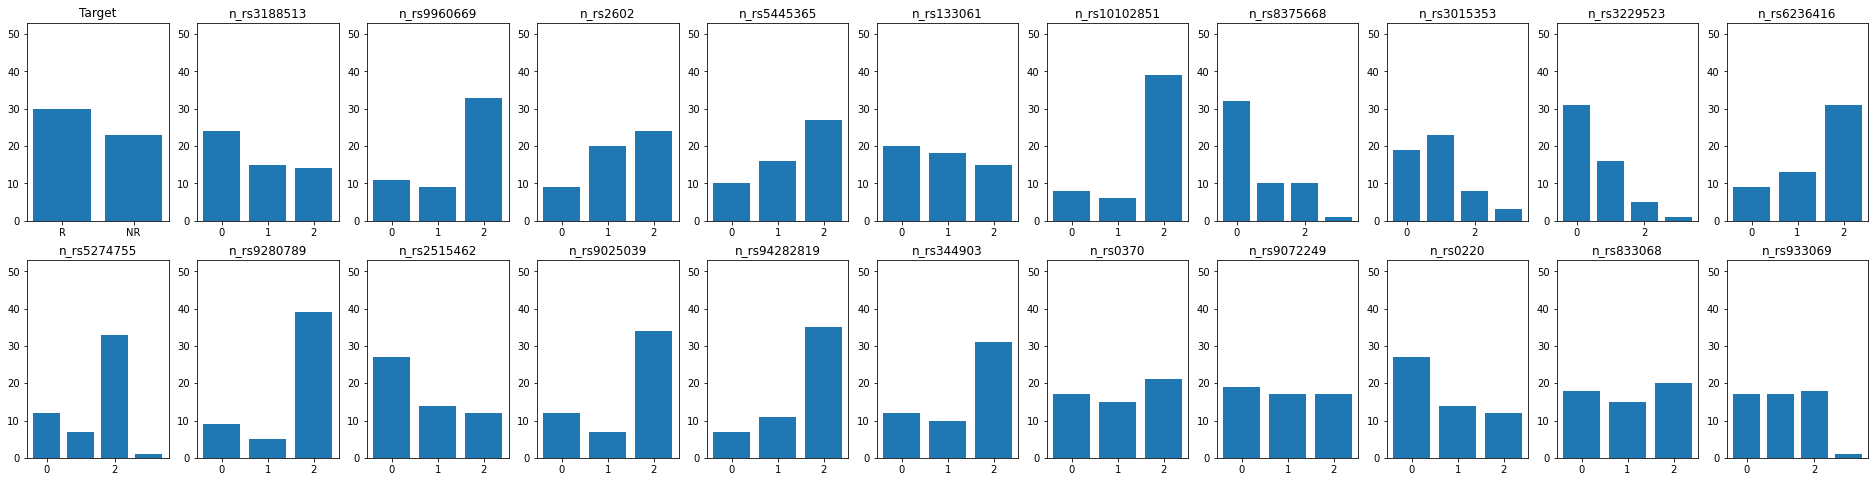

In [103]:
# examining the distribution of the data, plotting for each feature the frequency of each of its values
fig, axes = plt.subplots(figsize = (33, 8), ncols = 11, nrows = 2)
for i, col in enumerate(data.columns.values):
    x_pos = 0 if i < 11 else 1
    y_pos = i % 11
    counts = data[col].value_counts()
    counts_keys = list(counts.keys())
    counts_values = [counts[key] for key in counts_keys]
    axes[x_pos, y_pos].bar(counts_keys, counts_values)
    axes[x_pos, y_pos].set_ylim(0, data.shape[0])
    axes[x_pos, y_pos].set_title(col)
fig;

We can see that the classes 'R' and 'NR' are more or less balanced, not exactly 50-50 % but approximately, there is not a big difference.

Also, there is a small number of features which have 3 as a value. I am considering that to be a fourth category, distinct from 0 ('MM'), 1 ('WW') and 2 ('WM').

In [7]:
X = data.iloc[:, data.columns != "Target"]
y = data.Target

In [8]:
X.head()

,n_rs3188513,n_rs9960669,n_rs2602,n_rs5445365,n_rs133061,n_rs10102851,n_rs8375668,n_rs3015353,n_rs3229523,n_rs6236416,...,n_rs9280789,n_rs2515462,n_rs9025039,n_rs94282819,n_rs344903,n_rs0370,n_rs9072249,n_rs0220,n_rs833068,n_rs933069
0,0,2,0,1,0,0,1,1,0,2,...,2,2,0,0,2,0,2,1,2,2
1,1,2,0,2,2,2,1,0,0,1,...,0,1,2,1,0,0,0,0,1,0
2,1,1,2,0,0,2,0,1,1,1,...,2,0,2,2,0,0,0,1,0,0
3,0,2,2,1,1,0,0,0,1,1,...,2,0,2,2,2,2,2,1,1,1
4,0,2,0,0,1,2,0,1,0,2,...,1,0,2,2,2,0,0,1,1,0


In [9]:
y.values

array(['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'NR', 'NR', 'NR', 'NR',
       'NR', 'NR', 'NR', 'NR', 'NR', 'NR', 'NR', 'NR', 'NR', 'NR', 'NR',
       'NR', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'NR', 'NR', 'NR',
       'NR', 'NR', 'R', 'NR', 'NR'], dtype=object)

In [10]:
print(X.shape, y.shape)

(53, 21) (53,)


The features are categorical features, and have as values: 0, 1, 2 and sometimes 3. However, maybe there could be a problem with this representation, because if a machine learning algorithm relies on distances, the distance between 0 and 2 is two times the distance between 0 and 1. It may be preferrable that every possible category of a feature is equidistant with each other. Therefore, I will also try one-hot encoding, using pandas get_dummies method. For example: feature A, with possible categories 0, 1 and 2, would get split into three features: A_0, A_1 and A_2, and each of the features would have only 0 or 1 as possible values.

I will use for each of the algorithms both datasets: the original one, and the one-hot encoded one.

In [11]:
# One-hot encoding
one_hot_X = pd.get_dummies(X, columns=X.columns)
one_hot_X.head()

,n_rs3188513_0,n_rs3188513_1,n_rs3188513_2,n_rs9960669_0,n_rs9960669_1,n_rs9960669_2,n_rs2602_0,n_rs2602_1,n_rs2602_2,n_rs5445365_0,...,n_rs0220_0,n_rs0220_1,n_rs0220_2,n_rs833068_0,n_rs833068_1,n_rs833068_2,n_rs933069_0,n_rs933069_1,n_rs933069_2,n_rs933069_3
0,1,0,0,0,0,1,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,0,1,0,0,0,1,1,0,0,0,...,1,0,0,0,1,0,1,0,0,0
2,0,1,0,0,1,0,0,0,1,1,...,0,1,0,1,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
4,1,0,0,0,0,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0


### Initial split

I will split the data into two sets:

- TrainVal (and TrainValOH for the one-hot dataset): the training and validation set. I will use it to train the models, and with crossvalidation to perform the hyperparameter tuning of each model and to select the best model for this task.

- Test (and TestOH for the one-hot dataset): the test set. This is a set that won't be used until the final model has been chosen, so that we can evaluate how well the model generalizes to previously unseen data.

In [12]:
from sklearn.model_selection import train_test_split
# Split train+validation and test using sklearn.model_selection.train_test_split function
# using stratify = y so that both 'R' and 'NR' are in equal proportions in the test set
# Splitting the original dataset
XTrainVal, XTest, yTrainVal, yTest = train_test_split(X, y, test_size=0.25, random_state = 125, stratify = y)
# And also the one-hot encoded dataset
XTrainValOH, XTestOH, yTrainValOH, yTestOH = train_test_split(one_hot_X, y, test_size=0.25, random_state = 125, stratify = y)

In [13]:
# The label arrays should be identical in both cases because the split is seeded
print(np.all(yTrainVal == yTrainValOH))
print(np.all(yTest == yTestOH))

True
True


In [14]:
print("Dimensions of the original data.")
print("XTrainVal: {}, XTest: {}, yTrainVal: {}, yTest: {}".format(XTrainVal.shape, XTest.shape, yTrainVal.shape, yTest.shape))
print("Dimensions of the one-hot encoded data.") 
print("XTrainVal: {}, XTest: {}, yTrainVal: {}, yTest: {}".format(XTrainValOH.shape, XTestOH.shape, yTrainValOH.shape, yTestOH.shape))
# Because each feature from X had as possible values 0, 1 or 2 (and 3 in a few cases), 
# the one-hot encoded data has a little more than three times the number of features

Dimensions of the original data.
XTrainVal: (39, 21), XTest: (14, 21), yTrainVal: (39,), yTest: (14,)
Dimensions of the one-hot encoded data.
XTrainVal: (39, 68), XTest: (14, 68), yTrainVal: (39,), yTest: (14,)


In [15]:
print(yTest.values) # checking that every class is more or less equally represented in the Test set
for label in yTest.unique():
    print(label, ":","  Absolute frequency:",sum(yTest == label),"  Relative frequency:",sum(yTest == label)/len(yTest))

['R' 'NR' 'NR' 'R' 'R' 'NR' 'NR' 'R' 'R' 'R' 'NR' 'R' 'NR' 'R']
R :   Absolute frequency: 8   Relative frequency: 0.5714285714285714
NR :   Absolute frequency: 6   Relative frequency: 0.42857142857142855


In [16]:
print(yTrainVal.values) # checking the same for the TrainVal set
for label in yTest.unique():
    print(label, ":","  Absolute frequency:",sum(yTrainVal == label),"  Relative frequency:",sum(yTrainVal == label)/len(yTrainVal))

['NR' 'NR' 'NR' 'R' 'NR' 'R' 'NR' 'NR' 'NR' 'R' 'NR' 'R' 'NR' 'R' 'NR' 'R'
 'R' 'R' 'NR' 'NR' 'NR' 'R' 'R' 'NR' 'R' 'R' 'R' 'R' 'R' 'R' 'NR' 'NR' 'R'
 'R' 'R' 'NR' 'R' 'R' 'R']
R :   Absolute frequency: 22   Relative frequency: 0.5641025641025641
NR :   Absolute frequency: 17   Relative frequency: 0.4358974358974359


The two classes are more or less balanced, both in the TrainVal set and in the Test set. 

Approximately 55% of the samples have the label 'R' and 45% of the samples have the label 'NR' in both cases.

## Training and hyperparameter tuning

I will use GridSearchCV to perform cross validation. By passing a parameter grid, the algorithm will choose the optimal hyperparameters, according to the metric defined in the argument 'scoring'. I will use accuracy as a metric to choose the optimal hyperparameters, because there isn't a big unbalance between both of the classes. 

When choosing between the different models (logistic regression, KNN, ...) I will take into account other metrics as well.

When possible, I will use leave one out cross validation, because there are very few samples. If the  computational time is too big because the model has high complexity (such as random forests), I will use 10-fold cross validation instead.

The evaluation of each model using the TrainVal set will be performed in the next section, "Evaluation of the models and selection of the best model". 

### Logistic regression

The first classifier we will train is a LogisticRegression classifier, a linear model used for classification, which models the probabilities of each label using a logistic function.

To find the optimal hyperparameters, I will use leave one out crossvalidation, using a grid search cross validator.

Hyperparameters that I will tune:

* **max_iter**: the maximum number of iterations that the solvers can take to converge. The default is 100, I will try more iterations.
* **C**: the parameter that controls regularization. It is the inverse of the regularization strength, so smaller values of C mean higher regularization.
* **class_weight**: when None, every class ('R' and 'NR' in our case) is considered equal. When "balanced", it adjusts the weights of the classes to be inversely proportional to their frequencies: this way, if the dataset is imbalanced, it makes both classes have the same importance. In our case the dataset is not imbalanced, but it is not a perfect 50/50%, so I will try this.
* **solver**: "lbfgs" solver is the default way of optimizig the objective function. According to sklearn documentation, "liblinear" is a good option for small datasets. I am trying both.
* **penalty**: depending on the solver, the regularization can be made using different penalties. The penalty for "L2" regularization is a squared magnitude; while the penalty for "L1" regularization is an absolute value magnitude, without squaring. Those penalties are applied to the loss function, and its magnitude depends on the regularization strength (the inverse of the C parameter).




In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, LeaveOneOut

cv_fold = LeaveOneOut() # Leave one out crossvalidation because there are very few samples
print("Trying", cv_fold, "fold crossvalidation to tune the hyperparameters: ")
# defining the parameter range 
max_iter_range = [100, 500, 1000] 
print("Trying max iterations:", *max_iter_range)
C_range = [10**i for i in range(-7, 8)]
print("Trying C in steps of 10 from", C_range[0], "to", C_range[-1])
class_weights = [None, "balanced"]
print("Trying class weights:", *class_weights)
solvers = ['liblinear', 'lbfgs'] # from sklearn documentation, liblinear is a good solver algorithm for small datasets, lbfgs is the default 
print("Trying solvers:", *solvers)
# Each solver allows different regularization penalties
liblinear_penalties = ["l1", "l2"]
print("Trying penalties for liblinear solver:", *liblinear_penalties)
lbfgs_penalties = ["l2"]
print("Trying penalties for lbfgs solver:", *lbfgs_penalties)

# paramgrid:
# list of two dictionaries because each solver allows different penalty arguments
param_grid = [
    {'solver': ['liblinear'], 'max_iter': max_iter_range, 'C': C_range, 'class_weight': class_weights, 'penalty': liblinear_penalties},
    {'solver': ['lbfgs'], 'max_iter': max_iter_range, 'C': C_range, 'class_weight': class_weights, 'penalty': lbfgs_penalties}
    ]

# Do the cross-validation
# using the accuracy as the metric to optimize
lr = GridSearchCV(LogisticRegression(random_state = 125), param_grid, cv=cv_fold, scoring='accuracy', n_jobs = -1)
lr_oh = GridSearchCV(LogisticRegression(random_state = 125), param_grid, cv=cv_fold, scoring='accuracy', n_jobs = -1)
# random_state = 125 to ensure reproducibility when using 'liblinear' solver

# Performing the crossvalidation using the TrainVal set
# original set:
lr.fit(XTrainVal,yTrainVal)
# one-hot encoded set:
lr_oh.fit(XTrainValOH,yTrainValOH)

Trying LeaveOneOut() fold crossvalidation to tune the hyperparameters: 
Trying max iterations: 100 500 1000
Trying C in steps of 10 from 1e-07 to 10000000
Trying class weights: None balanced
Trying solvers: liblinear lbfgs
Trying penalties for liblinear solver: l1 l2
Trying penalties for lbfgs solver: l2


GridSearchCV(cv=LeaveOneOut(), estimator=LogisticRegression(random_state=125),
             n_jobs=-1,
             param_grid=[{'C': [1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1,
                                1, 10, 100, 1000, 10000, 100000, 1000000,
                                10000000],
                          'class_weight': [None, 'balanced'],
                          'max_iter': [100, 500, 1000], 'penalty': ['l1', 'l2'],
                          'solver': ['liblinear']},
                         {'C': [1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1,
                                1, 10, 100, 1000, 10000, 100000, 1000000,
                                10000000],
                          'class_weight': [None, 'balanced'],
                          'max_iter': [100, 500, 1000], 'penalty': ['l2'],
                          'solver': ['lbfgs']}],
             scoring='accuracy')

In [18]:
#Obtain the best parameters, and the best estimator
print("Best parameters for the model without one-hot encoding:")
print(lr.best_params_)
lr_best = lr.best_estimator_
print(lr_best)

Best parameters for the model without one-hot encoding:
{'C': 0.0001, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
LogisticRegression(C=0.0001, class_weight='balanced', random_state=125)


In [19]:
#Obtain the best parameters, and the best estimator
print("Best parameters for the model with one-hot encoding:")
print(lr_oh.best_params_)
lr_oh_best = lr_oh.best_estimator_
print(lr_oh_best)

Best parameters for the model with one-hot encoding:
{'C': 0.1, 'class_weight': None, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
LogisticRegression(C=0.1, random_state=125, solver='liblinear')


### Decision Trees

Regarding the Decision Tree classifier:

To find the optimal hyperparameters, I will also use leave one out crossvalidation, using a grid search cross validator.

A decision tree without limits is prone to overfitting, and the terminal nodes end up containing only one sample. In those cases, it is memorizing the training set, so its generalization ability will be impaired.

To avoid this, we can tune the hyperparameters to limit the overfitting of tree.

Hyperparameters that I will tune:

* **criterion**: the criterion for measuring the quality of a split. I will try 'gini' for Gini impurity (related to how pure or homogeneous the node is) and 'entropy' related to the information gain.
* **max_depth**: this is an important hyperparameter to avoid overfitting of the tree. It controls the maximum depth of the tree. By default it is not limited, I will try different maximum depths. 
* **min_samples_split**: the minimum number of samples required to split a node into two child nodes. The larger this is, the less splits there will be. Therefore, larger values of this parameter help us avoid overfitting. By default this is not limited (the default is 2).
* **min_samples_leaf**: the minimum number of samples that can be in a leaf node (a terminal node). This helps us avoid the problem I described earlier, where every leaf node has only one sample, so again, larger values of this parameter also help us avoid overfitting. By default, this is also not limited (default is 1).

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, LeaveOneOut

cv_fold = LeaveOneOut() # Leave one out crossvalidation because there are very few samples
print("Trying", cv_fold, "fold crossvalidation to tune the hyperparameters: ")
# defining the parameters of the tree to be checked with cross-validation 
min_samples_leaf_range = [2, 3, 4, 6, 8, 10]
min_samples_split_range = [i for i in range(2, 21, 2)] # from 2 to 20, evens only
max_depth_range = [2,3,4,5,7,8,10,15] 
criterions = ['entropy','gini']
print("Trying min samples leaf:", *min_samples_leaf_range)
print("Trying min samples split:", *min_samples_split_range)
print("Trying max depth:", *max_depth_range)
print("Trying criterions: 'entropy' and 'gini'")
#Creating the param grid
param_grid = {'min_samples_leaf': min_samples_leaf_range,
              'min_samples_split': min_samples_split_range,
              'max_depth': max_depth_range,
              'criterion': criterions}

# Create a gridsearch using the Decision Tree Classifier
# using the accuracy as the metric to optimize
dtc = GridSearchCV(DecisionTreeClassifier(random_state = 125), param_grid, cv=cv_fold, scoring = 'accuracy', n_jobs = -1)
dtc_oh = GridSearchCV(DecisionTreeClassifier(random_state = 125), param_grid, cv=cv_fold, scoring = 'accuracy', n_jobs = -1)

# Performing the crossvalidation using the TrainVal set
# original set:
dtc.fit(XTrainVal,yTrainVal)
# one-hot encoded set:
dtc_oh.fit(XTrainValOH,yTrainValOH)

Trying LeaveOneOut() fold crossvalidation to tune the hyperparameters: 
Trying min samples leaf: 2 3 4 6 8 10
Trying min samples split: 2 4 6 8 10 12 14 16 18 20
Trying max depth: 2 3 4 5 7 8 10 15
Trying criterions: 'entropy' and 'gini'


GridSearchCV(cv=LeaveOneOut(),
             estimator=DecisionTreeClassifier(random_state=125), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 3, 4, 5, 7, 8, 10, 15],
                         'min_samples_leaf': [2, 3, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18,
                                               20]},
             scoring='accuracy')

In [21]:
#Obtain the best parameters, and the best estimator
print("Best parameters found by grid search on the data without one-hot encoding:")
print(dtc.best_params_)
dtc_best = dtc.best_estimator_

Best parameters found by grid search on the data without one-hot encoding:
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [22]:
#Obtain the best parameters, and the best estimator
print("Best parameters found by grid search on the data with one-hot encoding:")
print(dtc_oh.best_params_)
dtc_oh_best = dtc_oh.best_estimator_

Best parameters found by grid search on the data with one-hot encoding:
{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 2}


### KNN

Continuing with the K-nearest neighbors classifier. This is one of the simplest classifiers, classifying each sample based on the k neighbors that are closer to the sample, based on a distance metric.

To find the optimal hyperparameters, I will also use leave one out crossvalidation, using a grid search cross validator.

There are few hyperparameters for this classifier.

Hyperparameters that I will tune:

* **n_neighbors**: the number of neighbors used to determine the class of a sample. By default it is 5, and I will try a range of odd values (so that there are no ties) from 1 to approximately 90% of the sample size.
* **p**: the default distance metric is Minkowski distance, which is a generalization of Manhattan and Euclidean distances. The value of p determines the distance: for p = 1, Minkowski is equivalent to Manhattan distance. For p = 2, it is equivalent to Euclidean distance. There can be higher values of p, however I will only try p = 1 (Manhattan) or p = 2 (Euclidean).

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, LeaveOneOut

max_k = int(XTrainVal.shape[0] * 0.9) # setting the maximum k value as roughly the 90% of samples
cv_fold = LeaveOneOut() # Leave one out crossvalidation because there are very few samples
print("Trying", cv_fold, "fold crossvalidation to tune the hyperparameters: ")
# defining the parameter range 
print("Trying the odd k values from 1 to", max_k)
print("Trying Manhattan distance (p = 1) vs Euclidean distance (p = 2)")
k_range = [i for i in range(1, max_k + 1) if i%2] # every odd number between 1 and max_k
distances = [1, 2] # p = 1 is equivalent to Manhattan distance, p = 2 to Euclidean distance
param_grid = {'n_neighbors': k_range, 'p': distances}

# Do the cross-validation
# using the accuracy as the metric to optimize
knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=cv_fold, scoring='accuracy', n_jobs = -1)
knn_oh = GridSearchCV(KNeighborsClassifier(), param_grid, cv=cv_fold, scoring='accuracy', n_jobs = -1)

# Performing the crossvalidation using the TrainVal set
# the original set:
knn.fit(XTrainVal,yTrainVal)
# the one-hot encoded set:
knn_oh.fit(XTrainValOH,yTrainValOH)

Trying LeaveOneOut() fold crossvalidation to tune the hyperparameters: 
Trying the odd k values from 1 to 35
Trying Manhattan distance (p = 1) vs Euclidean distance (p = 2)


GridSearchCV(cv=LeaveOneOut(), estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29, 31, 33, 35],
                         'p': [1, 2]},
             scoring='accuracy')

In [24]:
#Obtain the best parameters, and the best estimator
print("Best parameters for data without one-hot encoding:")
print(knn.best_params_)
knn_best = knn.best_estimator_

Best parameters for data without one-hot encoding:
{'n_neighbors': 3, 'p': 1}


In [25]:
#Obtain the best parameters, and the best estimator
print("Best parameters for data with one-hot encoding:")
print(knn_oh.best_params_)
knn_oh_best = knn_oh.best_estimator_

Best parameters for data with one-hot encoding:
{'n_neighbors': 7, 'p': 1}


### Random Forest

The Random Forest classifier is an ensemble of many Decision Tree classifiers. For this to be good, it requires that each individual classifier has an error of less than 50%, and that the training set for each classifier has been different so that they all don't make the same mistakes.

To find the optimal hyperparameters, I will use crossvalidation, but in this case I will only use 10-fold, because this is a complex model, with many hyperparameters, and each Random Forest model is composed of many Decision Trees. Because of those reasons, leave one out crossvalidation takes a lot of time.

We have the same hyperparameters and the same problems a decision tree classifier does, however, the ensembling method helps avoid overfitting, improving the generalization ability of the classifier.

I will use bootstrap = True so that each individual tree is trained with a slightly different training set, one of the requirements of the ensemble methods.


'class_weight': ['balanced_subsample', None],
                         'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 4, 5, None],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [20, 50, 100, 200, 500]},

Hyperparameters that I will tune:

Related to the individual trees:

* **criterion**: the criterion for measuring the quality of a split. I will try 'gini' for Gini impurity (related to how pure or homogeneous the node is) and 'entropy' related to the information gain.
* **max_depth**: this is an important hyperparameter to avoid overfitting of the tree. It controls the maximum depth of the tree. By default it is not limited, I will try different maximum depths.
* **min_samples_split**: the minimum number of samples required to split a node into two child nodes. The larger this is, the less splits there will be. Therefore, larger values of this parameter help us avoid overfitting. By default this is not limited (the default is 2).
* **min_samples_leaf**: the minimum number of samples that can be in a leaf node (a terminal node). This helps us avoid the problem I described earlier, where every leaf node has only one sample, so again, larger values of this parameter also help us avoid overfitting. By default, this is also not limited (default is 1).
* **class_weight**: because each tree is trained with a bootstrapped dataset, there may be imbalances in the classes. I will try class weight "balanced_subsample", which makes it so that, for each tree, the importance of each class after bootstrapping is the same.

I am trying smaller ranges of hyperparameters than in the Decision Tree classifier, again because of the complexity of the model and the fact that it takes a lot of time to train and perform the crossvalidation.

Related to the forest:

* **n_estimators**: this is the number of Decision Trees that the Random Forest classifier has. The default is 200, I will try lower and higher values.



In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

cv_fold = 10 # using 10-fold crossvalidation instead of LeaveOneOut() because it is a complex model and it takes too much time to train otherwise
print("Trying", cv_fold, "fold crossvalidation to tune the hyperparameters: ")
# defining the parameter range 
num_estimators = [20, 50, 100, 200, 500]
print("Trying number of estimators:", *num_estimators)
criterions = ['entropy', 'gini']
print("Trying criterions entropy and gini")
min_samples_split_range = [2, 4, 6]
print("Trying min samples split:", *min_samples_split_range)
min_samples_leaf_range = [2, 3, 4]
print("Trying min samples leaf:", *min_samples_leaf_range)
max_depth_range = [2, 4, 5, None]
print("Trying max depth:", *max_depth_range, "(None = not limited)")
class_weights = ['balanced_subsample', None]
print("Trying class weights: ", *class_weights)

# Defining the param grid
param_grid = {'n_estimators': num_estimators, 
              'criterion': criterions,
              'min_samples_split': min_samples_split_range,
              'min_samples_leaf': min_samples_leaf_range,
              'max_depth': max_depth_range,
              'class_weight': class_weights}

# Do the cross-validation
# using the accuracy as the metric to optimize
# Using bootstrap so that each classifier gets trained with a different set
rfc = GridSearchCV(RandomForestClassifier(random_state=125, bootstrap=True), param_grid, cv=cv_fold, scoring='accuracy', n_jobs = -1)
rfc_oh = GridSearchCV(RandomForestClassifier(random_state=125, bootstrap=True), param_grid, cv=cv_fold, scoring='accuracy', n_jobs = -1)

# Performing the crossvalidation using the TrainVal set
# original set:
rfc.fit(XTrainVal,yTrainVal)
# one-hot encoded set:
rfc_oh.fit(XTrainValOH,yTrainValOH)

Trying 10 fold crossvalidation to tune the hyperparameters: 
Trying number of estimators: 20 50 100 200 500
Trying criterions entropy and gini
Trying min samples split: 2 4 6
Trying min samples leaf: 2 3 4
Trying max depth: 2 4 5 None (None = not limited)
Trying class weights:  balanced_subsample None


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=125),
             n_jobs=-1,
             param_grid={'class_weight': ['balanced_subsample', None],
                         'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 4, 5, None],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [20, 50, 100, 200, 500]},
             scoring='accuracy')

In [27]:
#Obtain the best parameters, and the best estimator
print("Best parameters for data without one-hot encoding:")
print(rfc.best_params_)
rfc_best = rfc.best_estimator_

Best parameters for data without one-hot encoding:
{'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}


In [28]:
#Obtain the best parameters, and the best estimator
print("Best parameters for data with one-hot encoding:")
print(rfc_oh.best_params_)
rfc_oh_best = rfc_oh.best_estimator_

Best parameters for data with one-hot encoding:
{'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


### Multilayer Perceptron

The last classifier is the MultiLayer Perceptron classifier, a neural network. It can approximate a function that relates the input (the features) with the output (the target label).

To find the optimal hyperparameters, I will use leave one out crossvalidation, using a grid search cross validator.

This is a complex model, with many hyperparameters. With our small dataset, a very complex model can suffer overfitting, because it will be easier to "memorize" the training data. There are strategies that we can follow to try and avoid overfitting.

Hyperparameters that I will tune:

* **max_iter**: the maximum number of iterations. The solver will iterate until it reaches convergence or until this number is reached.
* **activation**: the activation function for the hidden layer. The default is "relu", a rectified linear unit function which is f(x) = max(0, x). I will also try the "logistic" activation, which is the sigmoid function f(x) = 1 / (1 + e^(-x)).
* **solver**: as a solver, the default is "adam", a stochastic gradient-based optimizer. I will not use this, because according to sklearn documentation, "adam" works well on large datasets (thousands of samples), but for small datasets the solver "lbfgs" can converge faster and perform better.
* **hidden_layer_sizes**: the number and size of the hidden layers. The number of elements of the tuple indicate the number of hidden layers, and each numeric value indicates the number of neurons on that layer. Because neural networks are complex models and can be prone to overfitting, I will only use one hidden layer. The default is (100,), 1 hidden layer of 100 neurons, however for this problem I think a smaller layer would be best, so I will try some values from 1 to 10.
* **alpha**: the L2 regularization parameter. We want regularization in order to avoid overfitting. The default is 0.0001, I will try some values between 1e-06 and 1.

There are many more hyperparameters, however almost all of them are only usable with the other solvers (adam or sgd), not with lbfgs. This is positive, in a way, because the model will be less complex, and less prone to overfitting the training data.

Preprocessing:

The Multilayer Perceptron is sensitive to the scale of the input data. In the sklearn documentation it is recommended that the input data is in the range 0,1 or -1,1. (https://scikit-learn.org/stable/modules/neural_networks_supervised.html#mlp-tips)

In the case of the one-hot encoded dataset, the features are already in the range(0, 1), because each feature is a binary vector with 0 or 1 as possibilities. However, in the case of the original dataset, the features are not in that range.

I will use MinMaxScaler to scale the features to 0,1 range, so I will create a pipeline with the MinMaxScaler and the MLPClassifier.

I get a lot of warnings when running the next cell. That's because I am limiting the maximum number of iterations, therefore in some cases the solver lbfgs is not able to converge in that number of iterations.

In [29]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, LeaveOneOut
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

cv_fold = LeaveOneOut() # using LeaveOneOut crossvalidation because the number of samples is small
print("Trying", cv_fold, "fold crossvalidation to tune the hyperparameters: ")
# defining the parameter range 
max_iter_range = [200, 500, 1000, 2000] # maximum number of iterations
solvers = ['lbfgs'] # from sklearn documentation, lbfgs can converge faster and perform better on smaller datasets, so I will use this one.
L2_alpha = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1] # alpha parameter of the L2 regularization, default 0.0001
activations = ['logistic', 'relu'] # default 'relu', rectified linear unit function, I'll also try 'logistic' (sigmoid).
hidden_layer_sizes = [(1,), (2,), (3,), (4,), (5,), (6,), (8,), (10,)] # tuples of 1 element (so 1 hidden layer) with 1 to 15 neurons in that layer
print("Trying max iterations:", *max_iter_range)
print("Using solver:", *solvers)
print("Trying L2 regularization parameter alpha:", *L2_alpha)
print("Trying activation functions: sigmoid and relu")
print("Trying 1 hidden layer, with sizes: ", *hidden_layer_sizes)

# scaler so that the features are in 0,1 range
minmax = MinMaxScaler()
# multilayer perceptron
mlpclassifier = MLPClassifier(random_state = 125)
# pipeline with both steps
pipe = Pipeline(steps=[("minmax", minmax), ("mlp", mlpclassifier)])

# paramgrid
param_grid = {'max_iter': max_iter_range,
                'solver': solvers,
                'activation': activations,
                'alpha': L2_alpha, 
                'hidden_layer_sizes': hidden_layer_sizes}
# paramgrid for the pipeline, we need to say which stage corresponds to each parameter ('mlp__')
pipeline_param_grid = {'mlp__' + key : param_grid[key] for key in param_grid.keys()}

# Do the cross-validation
# using the Area under ROC curve as the metric to optimize

# mlp: using the pipeline to normalize the features to the range 0,1
mlp = GridSearchCV(pipe, pipeline_param_grid, cv=cv_fold, scoring='accuracy', n_jobs = -1)
# mlp_oh: we already have one_hot encoding, so no need to normalize the features to the range 0,1
mlp_oh = GridSearchCV(MLPClassifier(random_state = 125), param_grid, cv=cv_fold, scoring='accuracy', n_jobs = -1)

# Performing the crossvalidation using the TrainVal set
# original data
mlp.fit(XTrainVal,yTrainVal)
# one-hot encoded data
mlp_oh.fit(XTrainValOH,yTrainValOH)

Trying LeaveOneOut() fold crossvalidation to tune the hyperparameters: 
Trying max iterations: 200 500 1000 2000
Using solver: lbfgs
Trying L2 regularization parameter alpha: 1e-06 1e-05 0.0001 0.001 0.01 0.1 1
Trying activation functions: sigmoid and relu
Trying 1 hidden layer, with sizes:  (1,) (2,) (3,) (4,) (5,) (6,) (8,) (10,)


/home/javier/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/javier/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/javier/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_

GridSearchCV(cv=LeaveOneOut(), estimator=MLPClassifier(random_state=125),
             n_jobs=-1,
             param_grid={'activation': ['logistic', 'relu'],
                         'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1],
                         'hidden_layer_sizes': [(1,), (2,), (3,), (4,), (5,),
                                                (6,), (8,), (10,)],
                         'max_iter': [200, 500, 1000, 2000],
                         'solver': ['lbfgs']},
             scoring='accuracy')

In [30]:
#Obtain the best parameters, and the best estimator
print("Best parameters for the MLP without one-hot encoding:")
print(mlp.best_params_)
mlp_best = mlp.best_estimator_

Best parameters for the MLP without one-hot encoding:
{'mlp__activation': 'logistic', 'mlp__alpha': 0.01, 'mlp__hidden_layer_sizes': (3,), 'mlp__max_iter': 200, 'mlp__solver': 'lbfgs'}


In [31]:
#Obtain the best parameters, and the best estimator
print("Best parameters for the MLP with one-hot encoding:")
print(mlp_oh.best_params_)
mlp_oh_best = mlp_oh.best_estimator_

Best parameters for the MLP with one-hot encoding:
{'activation': 'logistic', 'alpha': 1e-06, 'hidden_layer_sizes': (4,), 'max_iter': 200, 'solver': 'lbfgs'}


## Evaluation of the models and selection of the best model

### Confusion matrix visualization

For an easy confusion matrix visualization, I'm using this code from https://github.com/DTrimarchi10/confusion_matrix that allows me to use the make_confusion_matrix function to plot a confusion matrix as a seaborn heatmap.

In [32]:
# This function is copied from https://github.com/DTrimarchi10/confusion_matrix
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

### Evaluation of the models obtained in the previous step

#### Storing the best models (obtained previously with .best_estimator_) in dictionaries

In [33]:
# Dictionary with the best models of each classification algorithm, using the original dataset
model_dict_not_oh = {'KNN': knn_best, 
                     'LogisticReg': lr_best, 
                     'RandomForest': rfc_best, 
                     'MLP': mlp_best, 
                     'DecisionTree': dtc_best}
# Dictionary with the best models of each classification algorithm, using the one-hot encoded dataset
model_dict_oh = {'KNN_OH': knn_oh_best, 
                 'LogisticReg_OH': lr_oh_best,
                 'RandomForest_OH': rfc_oh_best,
                 'MLP_OH': mlp_oh_best,
                 'DecisionTree_OH': dtc_oh_best}
# Merging both dictionaries
model_dict_full = {**model_dict_not_oh, **model_dict_oh}

#### Validation predictions to see the validation error

I am using cross_val_predict using LeaveOneOut split in order to get predictions using the TrainVal set. Because I am using cross_val_predict, for each fold, it gets the prediction of the sample that has not been used to train the model in that fold. 

Even though in cross_val_predict the model hasn't been trained with the sample it is predicting, the hyperparameters have been chosen using every sample (including that one), so it is not truly unseen data. However this is the closest thing that we have to tell how well the model generalizes, because we can't use the Test set until the end.

I am storing the predictions (.predict method) and the probability estimates of those predictions (.predict_proba method).

In [34]:
from sklearn.model_selection import cross_val_predict, LeaveOneOut

predictions_Val = {} # to store the predictions obtained with cross_val_predict
predict_probabilities_Val = {} # to store the results of predict_proba with cross_val_predict, for calculation of area under ROC

for model_name, model in model_dict_full.items():
    # Getting the predictions / probabilities using leave one out crossvalidation
    # Different X if it is one-hot or not
    if model_name in model_dict_not_oh.keys(): # not one-hot
        # predictions ("R" or "NR")
        yhatVal = cross_val_predict(model, XTrainVal, yTrainVal, cv = LeaveOneOut(), n_jobs = -1)
        # probabilities, to calculate the area under ROC curve
        y_proba_Val = cross_val_predict(model, XTrainVal, yTrainVal, cv = LeaveOneOut(), n_jobs = -1, method = "predict_proba")
    elif model_name in model_dict_oh.keys(): # one-hot
        # predictions ("R" or "NR")
        yhatVal = cross_val_predict(model, XTrainValOH, yTrainValOH, cv = LeaveOneOut(), n_jobs = -1)
        # probabilities, to calculate the area under ROC curve
        y_proba_Val = cross_val_predict(model, XTrainValOH, yTrainValOH, cv = LeaveOneOut(), n_jobs = -1, method = "predict_proba")
        
    # Storing the predictions and probabilities in the dictionaries
    predictions_Val[model_name] = yhatVal
    predict_probabilities_Val[model_name] = y_proba_Val

#### Training predictions to see the training error

In this case, I am simply predicting the labels of the TrainVal set without using cross_val_predict. This way I can compare how well the model does when it has been trained with the data it is predicting (training error) and when it has not been trained with it (validation error).

I am storing the predictions (.predict method) and the probability estimates of those predictions (.predict_proba method).

In [35]:
predictions_Train = {} # to store the predictions, computed with predict
predict_probabilities_Train = {} # to store the probabilities, computed with predict_proba

for model_name, model in model_dict_full.items():
    # Getting the predictions using .predict, and the probabilities using .predict_proba
    # Different X if it is one-hot or not
    if model_name in model_dict_not_oh.keys():
        yhatTrain = model.predict(XTrainVal)
        y_proba_Train = model.predict_proba(XTrainVal)
    elif model_name in model_dict_oh.keys():
        yhatTrain = model.predict(XTrainValOH)
        y_proba_Train = model.predict_proba(XTrainValOH)
    # Storing the predictions and probabilities in the dictionaries
    predictions_Train[model_name] = yhatTrain
    predict_probabilities_Train[model_name] = y_proba_Train

#### General strategy for evaluation of the models

Comparing the predictions of the Training set (without crossvalidation) and on the Validation set (using leave one out cross validation to predict them), we will be able to see if the trained model can generalize well, or if it is simply memorizing the training data.

If it performs well on the Training set and on the Validation set, it generalizes well, and we hope that, when presented with truly unseen data, it will be able to generalize as well.

If it performs well on the Training set but not on the Validation set, it is overfitting. The model is memorizing the training set but it is losing the ability to generalize to unseen data. So in this situation, the model won't do well when presented with truly unseen data.

If it doesn't perform well on any set, it is possible that the model is underfitting. It is neither learning well the training set, nor being able to generalize to unseen data.


As for the metrics, there are a lot of possible metrics we can consider. In this case, as the dataset is not imbalanced, the general performance can be measured by accuracy (metric used to optimize the hyperparameters). There are other metrics we can consider, such as the F1-score (combining precision and recall) or the Matthews correlation coefficient (MCC). From those, the MCC combines takes into account TP, FP, TN and FN, and it is an useful metric to evaluate the performance of the model (https://doi.org/10.1186/s13040-017-0155-3).

However, the False Positive Rate (FP / (FP + TN)) and the Positive Predictive Value (TP / (TP + FP)) are very important in this situation. I would like most or all of the patients that respond badly to the treatment (NR) to be correctly classified as such. That way, by identifying which patients won't respond well to this treatment, they could be treated with a different treatment that could potentially help them, because the early diagnosis and treatment are crucial for a succesful recovery. Therefore, it is important to have a **low proportion of false positives**.

Therefore, when I choose the best classifier, I will want it to generalize well (so that it can be applied to real data), and I will give more importance to having a **good Matthews correlation coefficient** (to evaluate the performance in general), and to having a **small False Positive Rate** and a **large Positive Predictive Value**, because I am interested in having a small amount of false positives. I cannot only look at the FPR, because a classifier that classifies everything as negative will have a FPR of 0, that is why I tuned the hyperparameters using accuracy, and why I will consider in the evaluation and model selection other metrics apart from the FPR.



#### Calculating different metrics

The confusion matrix has the information about true positives (TP), true negatives (TN), false positives (FP) and false negatives (FN) that I will use to calculate metrics such as sensitivity (recall), specificity, positive predictive value (precision), negative predictive value...

R     22
NR    17
Name: Target, dtype: int64
[[17  0]
 [22  0]]
[17  0 22  0]


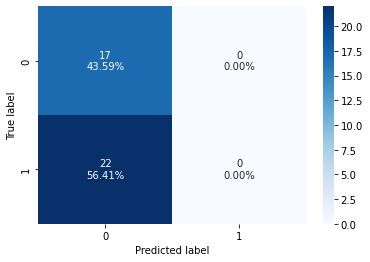

In [36]:
from sklearn.metrics import confusion_matrix
# As an example, confusion matrix of yTrainVal (reality) and a vector full of "NR" (prediction)
cm = confusion_matrix(y_true = yTrainVal, y_pred = np.full(yTrainVal.shape, "NR"))
print(yTrainVal.value_counts())
print(cm) # confusion matrix
print(cm.flatten()) # flattening the confusion matrix
make_confusion_matrix(cm, sum_stats=False) # function to make it pretty

We can see that the label 0 is NR and the label 1 is R.

If we consider NR as the negative class (bad response to the treatment) and R as the positive class (good response to the treatment), the confusion matrix shows:

[[ True negatives,  False positives ]

 [ False negatives,  True positives ]]




True negatives (TN): "NR" in reality, "NR" predicted

False positives (FP): "NR" in reality, "R" predicted

False negatives (FN): "R" in reality, "NR" predicted

True positives (TP): "R" in reality, "R" predicted

So, flattening the confusion matrix with .flatten() we can access TN in [0], FP in [1], FN in [2] and TP in [3]

In [37]:
# I'm creating a function to calculate some metrics
# It creates a confusion matrix with y_true and y_pred to calculate most of the metrics
# It uses y_predict_proba, the probability estimates of the predictions, to calculate the area under ROC

def get_metrics(y_true, y_pred, y_predict_proba, prefix = ""):
    # y_true: the real labels
    # y_pred: the predicted labels
    # y_predict_proba: the probability estimates of the predictions
    # prefix: optional, string to put before each metric in the dictionary (for example: training, validation, test...)

    # Related to y_pred:
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_true = y_true, y_pred = y_pred)
    cm_flat = cm.flatten()
    # this is in this case, because we define "NR" as the negative label and "R" as the positive label
    TN = cm_flat[0]
    FP = cm_flat[1]
    FN = cm_flat[2]
    TP = cm_flat[3]
    
    # calculating metrics
    # Accuracy: from all the predictions (TP + TN + FP + FN), how many are correct (TP + TN)
    ACC = (TP + TN) / (TP + TN + FP + FN)
    # True positive rate (sensitivity, recall): from all the real positives (TP + FN), how many are correctly predicted as positives (TP)
    TPR = TP / (TP + FN)
    # True negative rate (specificity): from all the real negatives (TN + FP), how many are correctly predicted as negatives (TN)
    TNR = TN / (TN + FP)
    # False positive rate: from all the real negatives (TN + FP), how many are incorrectly predicted as positives (FP). This is 1 - TNR
    FPR = 1 - TNR
    # False negative rate: from all the real positives (TP + FN), how many are incorrectly predicted as negatives (FN). This is 1 - TPR
    FNR = 1 - TPR
    # Positive predictive value (precision): from all the predicted positives (TP + FP), how many are actually real positives (TP)
    PPV = TP / (TP + FP)
    # Negative predictive value: from all the predicted negatives (TN + FN), how many are actually real negatives (TN)
    NPV = TN / (TN + FN)
    # F1-Score: harmonic mean between precision (PPV) and recall (TPR) 
    F1 = 2 * PPV * TPR / (PPV + TPR)
    # Matthews Correlation Coefficient: balanced measure that takes into account TP, TN, FP and FN
    MCC = ((TP * TN) - (FP * FN))/np.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN)) 

    # Related to y_pred_proba:
    from sklearn.metrics import roc_auc_score
    # To calculate the area under ROC curve using the probabilities computed with predict_proba
    # The ROC curve is the TPR (sensitivity) plotted against the FPR (1 - specificity),
    # An area under curve of 1 is 100% TPR, 0% FPR
    y_score = y_predict_proba[:, 1] # getting the probabilities for the class with the greater label, the one at model.classes_[1]
    ROC_AUC = roc_auc_score(y_true = y_true, y_score = y_score)

    # Returning a dictionary with all of these metrics, rounded up to 3 decimal places
    metrics_dict = {prefix + "accuracy": ACC,
                    prefix + "true positive rate = sensitivity = recall": TPR,
                    prefix + "true negative rate = specificity": TNR,
                    prefix + "false positive rate": FPR,
                    prefix + "false negative rate": FNR,
                    prefix + "positive predictive value = precision": PPV,
                    prefix + "negative predictive value": NPV,
                    prefix + "F1 score": F1,
                    prefix + "Matthews correlation coefficient": MCC,
                    prefix + "area under ROC": ROC_AUC}
                    
    return metrics_dict

In [38]:
list_of_dicts = []
for model_name in sorted(model_dict_full.keys()):
    # Training metrics, from the dictionary predictions_Train and predict_probabilities_Train
    train_metrics = get_metrics(y_true = yTrainVal, 
                                y_pred = predictions_Train[model_name], 
                                y_predict_proba= predict_probabilities_Train[model_name], 
                                prefix = "Training: ")
    # Validation metrics, from the dictionary predictions_Val and predict_probabilities_Val, computed using cross_val_predict
    val_metrics = get_metrics(y_true = yTrainVal, 
                              y_pred = predictions_Val[model_name], 
                              y_predict_proba= predict_probabilities_Val[model_name],
                              prefix = "Validation: ")
    # merging both dictionaries
    train_val_metrics = {"Model": model_name, **train_metrics, **val_metrics}
    # appending the dictionary to list_of_dicts
    list_of_dicts.append(train_val_metrics)


In [39]:
# Converting the list of dictionaries into a pandas dataframe
models_train_val_metrics = pd.DataFrame(list_of_dicts)

In [40]:
# Validation metrics
models_val_metrics = models_train_val_metrics[["Model", *[col for col in models_train_val_metrics.columns if "Validation" in col]]]
models_val_metrics

,Model,Validation: accuracy,Validation: true positive rate = sensitivity = recall,Validation: true negative rate = specificity,Validation: false positive rate,Validation: false negative rate,Validation: positive predictive value = precision,Validation: negative predictive value,Validation: F1 score,Validation: Matthews correlation coefficient,Validation: area under ROC
0,DecisionTree,0.666667,0.727273,0.588235,0.411765,0.272727,0.695652,0.625000,0.711111,0.318070,0.645722
1,DecisionTree_OH,0.615385,0.636364,0.588235,0.411765,0.363636,0.666667,0.555556,0.651163,0.223407,0.562834
2,KNN,0.897436,0.863636,0.941176,0.058824,0.136364,0.950000,0.842105,0.904762,0.798434,0.965241
3,KNN_OH,0.897436,0.863636,0.941176,0.058824,0.136364,0.950000,0.842105,0.904762,0.798434,0.922460
4,LogisticReg,0.923077,0.954545,0.882353,0.117647,0.045455,0.913043,0.937500,0.933333,0.843693,0.951872
5,LogisticReg_OH,0.948718,1.000000,0.882353,0.117647,0.000000,0.916667,1.000000,0.956522,0.899346,0.941176
6,MLP,0.923077,0.909091,0.941176,0.058824,0.090909,0.952381,0.888889,0.930233,0.845757,0.949198
7,MLP_OH,0.923077,0.909091,0.941176,0.058824,0.090909,0.952381,0.888889,0.930233,0.845757,0.949198
8,RandomForest,0.897436,0.954545,0.823529,0.176471,0.045455,0.875000,0.933333,0.913043,0.793060,0.911765
9,RandomForest_OH,0.897436,0.954545,0.823529,0.176471,0.045455,0.875000,0.933333,0.913043,0.793060,0.911765


In [41]:
# Training metrics
models_train_metrics = models_train_val_metrics[["Model", *[col for col in models_train_val_metrics.columns if "Training" in col]]]
models_train_metrics

,Model,Training: accuracy,Training: true positive rate = sensitivity = recall,Training: true negative rate = specificity,Training: false positive rate,Training: false negative rate,Training: positive predictive value = precision,Training: negative predictive value,Training: F1 score,Training: Matthews correlation coefficient,Training: area under ROC
0,DecisionTree,0.948718,1.000000,0.882353,0.117647,0.000000,0.916667,1.000000,0.956522,0.899346,0.987968
1,DecisionTree_OH,0.923077,1.000000,0.823529,0.176471,0.000000,0.880000,1.000000,0.936170,0.851297,0.974599
2,KNN,0.923077,0.909091,0.941176,0.058824,0.090909,0.952381,0.888889,0.930233,0.845757,0.978610
3,KNN_OH,0.923077,0.909091,0.941176,0.058824,0.090909,0.952381,0.888889,0.930233,0.845757,0.966578
4,LogisticReg,0.974359,1.000000,0.941176,0.058824,0.000000,0.956522,1.000000,0.977778,0.948818,0.978610
5,LogisticReg_OH,0.974359,1.000000,0.941176,0.058824,0.000000,0.956522,1.000000,0.977778,0.948818,1.000000
6,MLP,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
7,MLP_OH,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
8,RandomForest,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
9,RandomForest_OH,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Those are the general metrics, I will go model by model discussing them and plotting some plots to visualize the results better.

#### Function for plotting a ROC curve

In [42]:
def plot_roc_curve(y_true, predict_proba_dict, prefix = "", title = None):

    from sklearn.metrics import roc_curve

    linestyle_tuples = [('dotted',                (0, (1, 1))),
                        ('densely dashdotted',    (0, (3, 1, 1, 1)))]

    fig, ax = plt.subplots(figsize = (8, 5))
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)

    for i, (model_name, y_predict_proba) in enumerate(predict_proba_dict.items()):

        # getting the probabilities for the class with the greater label, the one at model.classes_[1], in this case "R"
        y_score = y_predict_proba[:, 1] 
        # getting the increasing false positive rates and true positive rates to plot the ROC curve
        fpr, tpr, _ = roc_curve(y_true, y_score, pos_label='R')
        # alternating between linestyles
        _, linestyle = linestyle_tuples[i % len(linestyle_tuples)]
        # plot TPR (y) against FPR (x)
        ax.plot(fpr, tpr, 
                 linestyle=linestyle, 
                 linewidth=3, 
                 label = prefix + model_name) 
        
    ax.plot([0, 1], [0, 1], 'k--', label = '') # dashed diagonal
    ax.set_xlabel("False Positive Rate (1 - Specificity)")
    ax.set_ylabel("True Positive Rate (Sensitivity)")
    ax.legend(loc = "lower right")
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    if title != None:
        ax.set_title(title)
    
    fig;

#### Logistic Regression

I will evaluate the logistic regression models, with and without one-hot encoding.

In [43]:
print("Logistic Regression")
print(lr.best_params_)
print(model_dict_full["LogisticReg"])
print("")
print("Logistic Regression")
print(lr_oh.best_params_)
print(model_dict_full["LogisticReg_OH"])

Logistic Regression
{'C': 0.0001, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
LogisticRegression(C=0.0001, class_weight='balanced', random_state=125)

Logistic Regression
{'C': 0.1, 'class_weight': None, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
LogisticRegression(C=0.1, random_state=125, solver='liblinear')


Confusion matrices

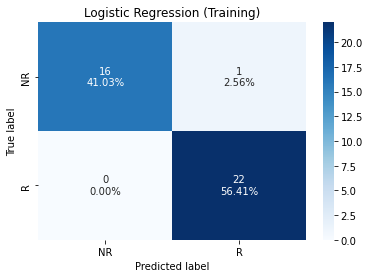

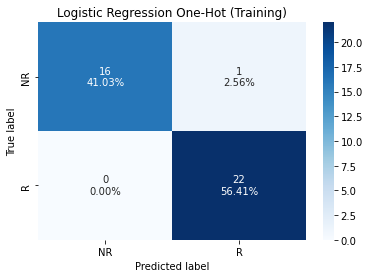

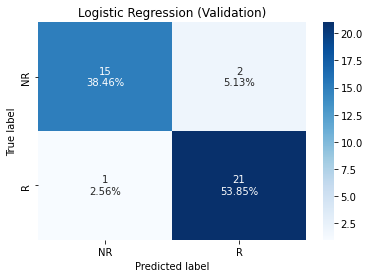

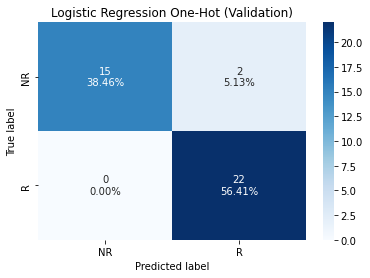

In [44]:
# LR without one-hot encoding, Training confusion matrix   
make_confusion_matrix(confusion_matrix(y_true = yTrainVal, y_pred = predictions_Train["LogisticReg"]), 
                      sum_stats = False, 
                      categories = model_dict_full["LogisticReg"].classes_,
                      title = "Logistic Regression (Training)")
# LR with one-hot encoding, Training confusion matrix
make_confusion_matrix(confusion_matrix(y_true = yTrainVal, y_pred = predictions_Train["LogisticReg_OH"]), 
                      sum_stats = False, 
                      categories = model_dict_full["LogisticReg_OH"].classes_,
                      title = "Logistic Regression One-Hot (Training)")
# LR without one-hot encoding, Validation confusion matrix   
make_confusion_matrix(confusion_matrix(y_true = yTrainVal, y_pred = predictions_Val["LogisticReg"]), 
                      sum_stats = False, 
                      categories = model_dict_full["LogisticReg"].classes_,
                      title = "Logistic Regression (Validation)")
# LR with one-hot encoding, Validation confusion matrix
make_confusion_matrix(confusion_matrix(y_true = yTrainVal, y_pred = predictions_Val["LogisticReg_OH"]), 
                      sum_stats = False, 
                      categories = model_dict_full["LogisticReg_OH"].classes_,
                      title = "Logistic Regression One-Hot (Validation)")

ROC curve

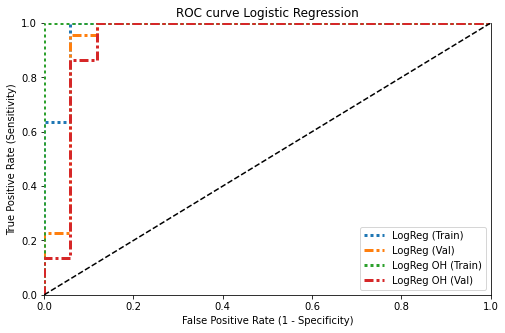

In [45]:
lr_proba_dict = {'LogReg (Train)': predict_probabilities_Train["LogisticReg"],
                 'LogReg (Val)': predict_probabilities_Val["LogisticReg"],
                 'LogReg OH (Train)': predict_probabilities_Train["LogisticReg_OH"],
                 'LogReg OH (Val)': predict_probabilities_Val["LogisticReg_OH"]}

plot_roc_curve(y_true = yTrainVal,
               predict_proba_dict= lr_proba_dict,
               title = "ROC curve Logistic Regression")

Metrics

In [46]:
models_val_metrics.query("Model == 'LogisticReg' or Model == 'LogisticReg_OH'")

,Model,Validation: accuracy,Validation: true positive rate = sensitivity = recall,Validation: true negative rate = specificity,Validation: false positive rate,Validation: false negative rate,Validation: positive predictive value = precision,Validation: negative predictive value,Validation: F1 score,Validation: Matthews correlation coefficient,Validation: area under ROC
4,LogisticReg,0.923077,0.954545,0.882353,0.117647,0.045455,0.913043,0.9375,0.933333,0.843693,0.951872
5,LogisticReg_OH,0.948718,1.000000,0.882353,0.117647,0.000000,0.916667,1.0000,0.956522,0.899346,0.941176


In [47]:
models_train_metrics.query("Model == 'LogisticReg' or Model == 'LogisticReg_OH'")

,Model,Training: accuracy,Training: true positive rate = sensitivity = recall,Training: true negative rate = specificity,Training: false positive rate,Training: false negative rate,Training: positive predictive value = precision,Training: negative predictive value,Training: F1 score,Training: Matthews correlation coefficient,Training: area under ROC
4,LogisticReg,0.974359,1.0,0.941176,0.058824,0.0,0.956522,1.0,0.977778,0.948818,0.97861
5,LogisticReg_OH,0.974359,1.0,0.941176,0.058824,0.0,0.956522,1.0,0.977778,0.948818,1.00000


Both logistic regression models were able to perform well with the training set.

Looking at the validation results:

During validation, they are both able to generalize well, the scores are approx 5% worse than in the training set. LogisticReg_OH performs better: there is 1 false negative in LogisticReg that is correctly classified by LogisticReg_OH. Both of them have 2 false positives. In general, there doesn't seem to be overfitting, probably because they are simple models and we are using regularization (L2 in both cases, looking at best_params_ above).

If we look at the ROC curves and at the area under ROC, we can also see that they are both good classifiers, and that they perform slightly worse in the validation than in the training (which is expected), but again, they are able to generalize well, and the area under ROC is around 0.95.

* _Interpretation of the logistic regression models:_

In [48]:
lr_model = model_dict_full["LogisticReg"]
lr_oh_model = model_dict_full["LogisticReg_OH"]

(From https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/)

The beta coefficients are the log odds ratio of each feature: the log odds that an observation is in class 1 given the values of that feature.

We can undo the logarithm, to get the odds ratio.

The odds ratio is: odds = P(class 1) / P(class 0) = P(class 1) / (1 - P(class 1)) --> therefore, P(class 1) = odds / (odds + 1)

With this, a probability of 0.5 means that that feature is not relevant for the classification. The higher the probability, the more relevant it is for predicting class 1 ("R" in our case); and the lower the probability, the more relevant it is for predicting class 0 ("NR" in our case).

If we look at the odds, it's the same idea: an odds ratio of 1 means that feature is irrelevant, odds ratio > 1 means it is relevant for predicting class 1, and odds ratio < 1 means it is relevant for predicting class 0. The more distant from 1, the more relevant the feature.

And, in logarithms, log odds = 0 means the feature is irrelevant, positive log odds is equivalent to odds > 1, and negative log odds equivalent to odds < 1.

This is only for one feature, but the complete expression is log odds = beta_0 + beta_1 * x1 + beta_2 * x2 ... + beta_n * xn, where beta_0 is the intercept, beta_1 ... beta_n are the coefficients, and x1 ... xn are the features.

In [89]:
beta_coefficients = lr_model.coef_[0] # log odds ratio
odds = np.exp(beta_coefficients) # to undo the logarithm
# odds = P(1) / (1 - P(1)) --> P(1) = odds / (odds + 1)
probs = odds / (odds + 1) 
beta_0 = lr_model.intercept_[0]
print("Intercept:", beta_0)
lr_dataframe = pd.DataFrame({'Feature': XTrainVal.columns, 'Coef (log odds)': beta_coefficients, 'Odds': odds, 'Probability': probs}) \
    .sort_values(by="Coef (log odds)", ascending=False)
lr_dataframe.style.hide_index()

Intercept: 0.010872838751806405


Feature,Coef (log odds),Odds,Probability
n_rs3229523,0.000187,1.000187,0.500047
n_rs2515462,-0.000010,0.999990,0.499997
n_rs9960669,-0.000047,0.999953,0.499988
n_rs94282819,-0.000161,0.999839,0.499960
n_rs9025039,-0.000162,0.999838,0.499960
n_rs3015353,-0.000234,0.999766,0.499942
n_rs833068,-0.000304,0.999696,0.499924
n_rs933069,-0.000406,0.999594,0.499899
n_rs0220,-0.000429,0.999571,0.499893
n_rs6236416,-0.000453,0.999547,0.499887


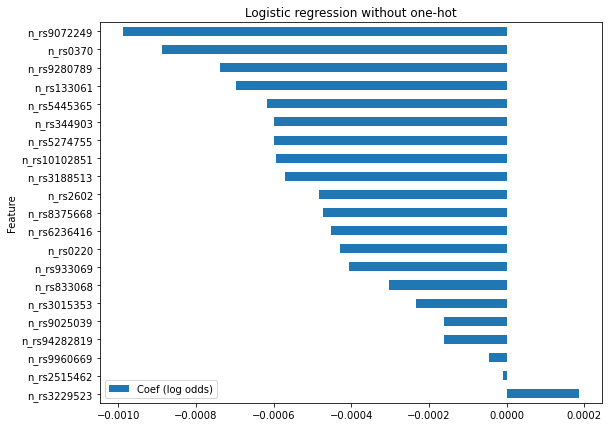

In [50]:
# As a plot
lr_dataframe[["Feature", "Coef (log odds)"]].plot(kind="barh", figsize=(9, 7), x="Feature")
plt.title("Logistic regression without one-hot");

The sign of the log odds in the expression "log odds = beta_0 + beta_1 * x1 + beta_2 * x2 ... + beta_n * xn" determines the prediction.
If that expression is positive (the log odds), the odds are > 1, which means the probability of class 1 is > 0.5, which means the sample gets classified into 1. And viceversa.

The intercept is 0.01, a positive number. That means that, when all of the features are 0, the probability of the sample being in class 1 is > 0.5, so it will get classified in class 1. In fact, that probability is:

In [90]:
print("Intercept:",beta_0)
print("Odds", np.exp(beta_0))
print("Probability(class 1)",np.exp(beta_0) / (1 + np.exp(beta_0)))

Intercept: 0.010872838751806405
Odds 1.010932162875325
Probability(class 1) 0.5027181829096844


It is bigger than 0.5, but not by much.

Looking at the rest of the coefficients (at the plot), we see that the last one, n_rs3229523, has a positive coefficient. The features can have values 0 or a positive number (1, 2, sometimes 3). If the coefficient is positive, it means that having a positive value of that feature increases the log odds and consequently the probability of being class 1 ("R"). However, the default (intercept) is already class 1, and 0.01 is not comparable to 0.0002, so this feature is probably not doing much.

On the other hand, the rest of the features have negative coefficients. The larger the coefficient (in absolute value), the more influence it has on the log odds and therefore on the final prediction. When a feature is 0, that coefficient doesn't have influence. The larger the numerical value of the feature (1, 2 or 3), the more impact the coefficient has on the prediction. Because the coefficients are negative, and the values of the features are positive, they tend to decrease the log odds ratio (increasing the probability of predicting class 0, "NR").

As an example, looking at n_rs9072249 (the top feature with the larger coefficient in absolute value): its beta coefficient is -0.001 (approx). When that feature is 0, it has no influence. But, when that feature is different from 0:

- if it is 1, (assuming everything else is 0): log odds = intercept - 0.001*1 = 0.01 - 0.001 = 0.009
- if it is 2, idem: log odds = intercept - 0.001*2 = 0.01 - 0.002 = 0.008

One feature by itself does not change much, a log odds of 0.008 still corresponds to a probability > 0.5 and gets predicted as 1 ("R"). But, there are many features in a sample and not all of them are going to be 0. And all of them except the last one have a negative coefficient. So, the more features that have a value different from 0, the more likely it is that the sample is predicted as "NR" (bad response to the treatment). A sample with every feature = 0 will only have the intercept and it will be predicted as "R" (good response to the treatment). 

Therefore, except in the case of n_rs3229523, it seems that (according to this model) having an allele different from "MM" (value 0) could be correlated with an increase in the probability of the treatment not working properly (label "NR"), especially in those SNPs that have a large negative beta coefficient (n_rs9072249, n_rs0370, n_rs9280789, n_rs133061, n_rs5445365...). Of course, nothing can be said about the cause, consequence, etcetera of this relationship, only that it probably exists. And some statistical analysis should be performed in order to determine whether this correlation is significant or not, and how much.

In the one-hot model:

In [96]:
beta_coefficients_OH = lr_oh_model.coef_[0] # log odds ratio
odds_OH = np.exp(beta_coefficients_OH) # to undo the logarithm
# odds = P(1) / (1 - P(1)) --> P(1) = odds / (odds + 1)
probs_OH = odds_OH / (1 + odds_OH)
beta_0_OH = lr_oh_model.intercept_[0]
print("Intercept:", beta_0_OH)
lr_oh_dataframe = pd.DataFrame({'Feature': XTrainValOH.columns, 'Coef (log odds)': beta_coefficients_OH, 'Odds': odds_OH, 'Probability': probs_OH}) \
    .sort_values(by="Coef (log odds)", ascending=False)
lr_oh_dataframe.style.hide_index()

Intercept: 0.050485183223908714


Feature,Coef (log odds),Odds,Probability
n_rs9072249_0,0.288154,1.333963,0.571544
n_rs0370_0,0.252179,1.286827,0.562713
n_rs3188513_0,0.218619,1.244357,0.554438
n_rs9280789_0,0.193739,1.213780,0.548284
n_rs10102851_0,0.191075,1.210550,0.547624
n_rs344903_0,0.183577,1.201508,0.545766
n_rs933069_0,0.175218,1.191506,0.543693
n_rs5274755_0,0.170054,1.185369,0.542411
n_rs133061_0,0.159115,1.172473,0.539695
n_rs5445365_0,0.145940,1.157127,0.536420


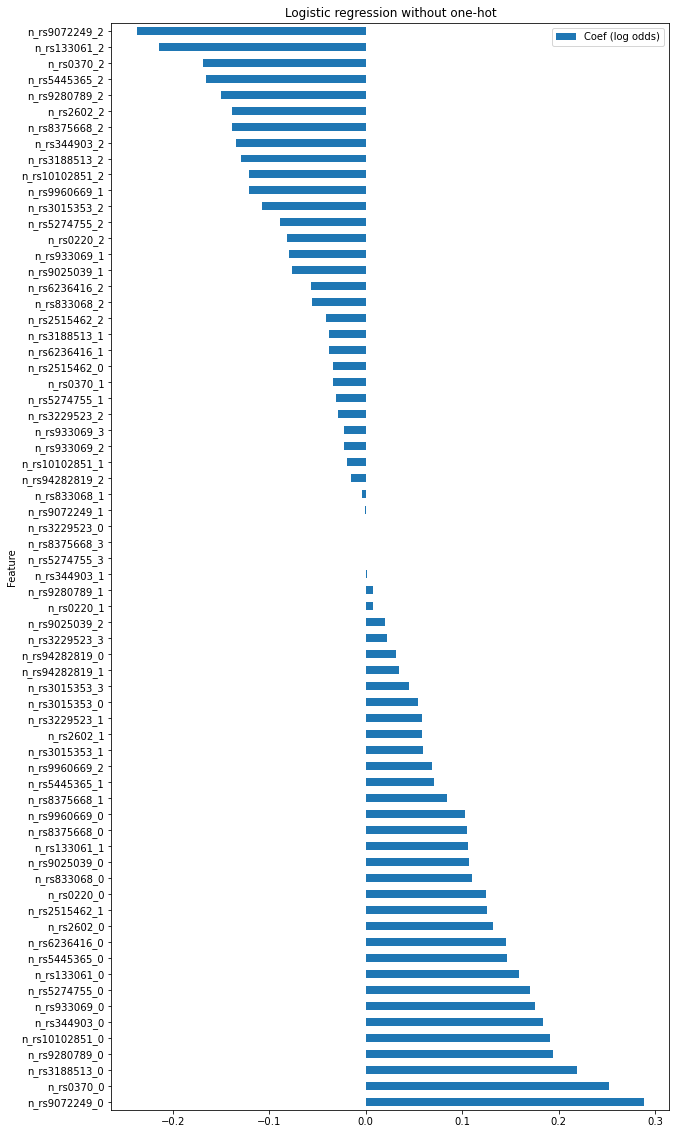

In [52]:
# As a plot
lr_oh_dataframe[["Feature", "Coef (log odds)"]].plot(kind="barh", figsize=(10, 20), x="Feature")
plt.title("Logistic regression without one-hot");

In this case, the intercept is 0.05, which also means that by default, if all of the features were 0, the sample would be classified as 1 ("R"). This doesn't make as much sense in this case, because we have done one-hot encoding, so for each 'feature' in the original dataset, either 'feature_0', 'feature_1'or 'feature_2' will have to be different than 0 in the one-hot encoded dataset, because the original feature had a value of 0, 1 or 2.

In any case:

In [91]:
print("Intercept:",beta_0_OH)
print("Odds", np.exp(beta_0_OH))
print("Probability(class 1)",np.exp(beta_0_OH) / (1 + np.exp(beta_0_OH)))

Intercept: 0.050485183223908714
Odds 1.051781279231839
Probability(class 1) 0.5126186157744906


This time, looking at the plot, we can see that it makes sense considering the interpretation of the logistic regression without one-hot encoding.

Most of the features corresponding to values of 0 ('feature_0') are at the bottom, with a positive coefficient. When 'feature_0' is 1, it increases the log odds, and therefore the probability that the sample gets classified as 1 ("R"). Likewise, the top of the plot mostly contains features corresponding to values of 2 ('feature_2') and sometimes 1 ('feature_1'), with a negative coefficient. When 'feature_2' or 'feature_1' is 1, it decreases the log odds, and therefore increases the probability that the sample gets classified as 0 ("NR").

In fact, the top five features of the one-hot model with negative coefficients are: n_rs9072249_2, n_rs0370_2, n_rs9280789_2, n_rs133061_2, n_rs5445365_2, which are the same as the top five features of the original model.

In [92]:
lr_dataframe.sort_values("Coef (log odds)").head()

,Feature,Coef (log odds),Odds,Probability
17,n_rs9072249,-0.000989,0.999012,0.499753
16,n_rs0370,-0.000887,0.999113,0.499778
11,n_rs9280789,-0.000739,0.999261,0.499815
4,n_rs133061,-0.000697,0.999303,0.499826
3,n_rs5445365,-0.000617,0.999384,0.499846


In [93]:
lr_oh_dataframe.sort_values("Coef (log odds)").head()

,Feature,Coef (log odds),Odds,Probability
57,n_rs9072249_2,-0.237352,0.788714,0.440939
14,n_rs133061_2,-0.214701,0.806783,0.446530
54,n_rs0370_2,-0.168223,0.845165,0.458043
11,n_rs5445365_2,-0.165774,0.847238,0.458651
39,n_rs9280789_2,-0.150250,0.860493,0.462508


They are in a different order, but they are still the same in both cases.

We can also see in the middle the features that have a coefficient of 0, so they don't matter at all in the model. They are two '_3' features (so the value 3 in those cases is irrelevant) and n_rs3229523_0. n_rs3229523 was the only feature in the model without one-hot encoding that had a positive coefficient.

#### Decision Tree Classifier
I will evaluate the decision trees, with and without one-hot encoding.

In [53]:
print("Decision Tree")
print(dtc.best_params_)
print(model_dict_full["DecisionTree"])
print("")
print("Decision Tree one-hot")
print(dtc_oh.best_params_)
print(model_dict_full["DecisionTree_OH"])

Decision Tree
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}
DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, random_state=125)

Decision Tree one-hot
{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 2}
DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=3,
                       random_state=125)


Confusion matrices

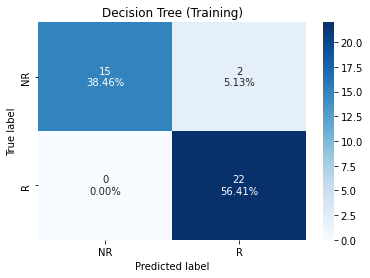

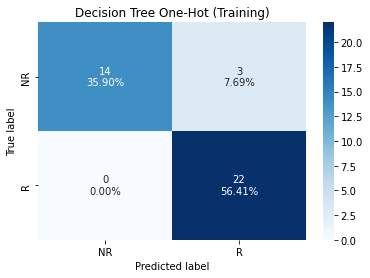

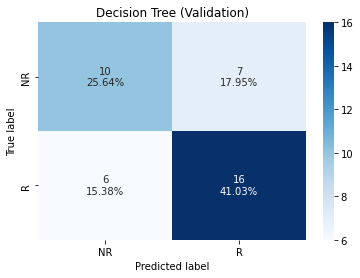

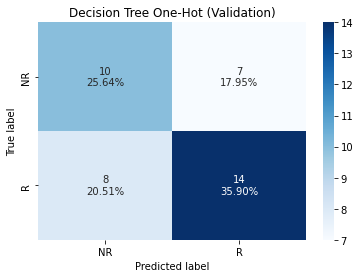

In [54]:
# Decision Tree without one-hot encoding, Training confusion matrix   
make_confusion_matrix(confusion_matrix(y_true = yTrainVal, y_pred = predictions_Train["DecisionTree"]), 
                      sum_stats = False, 
                      categories = model_dict_full["DecisionTree"].classes_,
                      title = "Decision Tree (Training)")
# Decision Tree with one-hot encoding, Training confusion matrix
make_confusion_matrix(confusion_matrix(y_true = yTrainVal, y_pred = predictions_Train["DecisionTree_OH"]), 
                      sum_stats = False, 
                      categories = model_dict_full["DecisionTree_OH"].classes_,
                      title = "Decision Tree One-Hot (Training)")
# Decision Tree without one-hot encoding, Validation confusion matrix   
make_confusion_matrix(confusion_matrix(y_true = yTrainVal, y_pred = predictions_Val["DecisionTree"]), 
                      sum_stats = False, 
                      categories = model_dict_full["DecisionTree"].classes_,
                      title = "Decision Tree (Validation)")
# Decision Tree with one-hot encoding, Validation confusion matrix
make_confusion_matrix(confusion_matrix(y_true = yTrainVal, y_pred = predictions_Val["DecisionTree_OH"]), 
                      sum_stats = False, 
                      categories = model_dict_full["DecisionTree_OH"].classes_,
                      title = "Decision Tree One-Hot (Validation)")

ROC curve

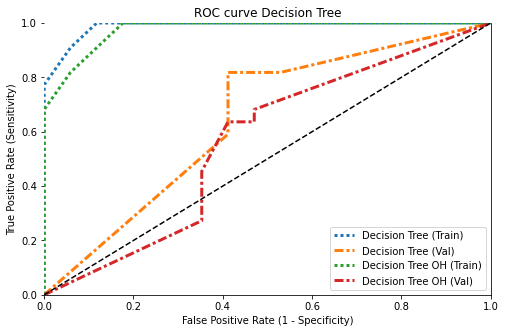

In [55]:
dtc_proba_dict = {'Decision Tree (Train)': predict_probabilities_Train["DecisionTree"],
                 'Decision Tree (Val)': predict_probabilities_Val["DecisionTree"],
                 'Decision Tree OH (Train)': predict_probabilities_Train["DecisionTree_OH"],
                 'Decision Tree OH (Val)': predict_probabilities_Val["DecisionTree_OH"]}

plot_roc_curve(y_true = yTrainVal,
               predict_proba_dict= dtc_proba_dict,
               title = "ROC curve Decision Tree")

Metrics

In [56]:
models_val_metrics.query("Model == 'DecisionTree' or Model == 'DecisionTree_OH'")

,Model,Validation: accuracy,Validation: true positive rate = sensitivity = recall,Validation: true negative rate = specificity,Validation: false positive rate,Validation: false negative rate,Validation: positive predictive value = precision,Validation: negative predictive value,Validation: F1 score,Validation: Matthews correlation coefficient,Validation: area under ROC
0,DecisionTree,0.666667,0.727273,0.588235,0.411765,0.272727,0.695652,0.625000,0.711111,0.318070,0.645722
1,DecisionTree_OH,0.615385,0.636364,0.588235,0.411765,0.363636,0.666667,0.555556,0.651163,0.223407,0.562834


In [57]:
models_train_metrics.query("Model == 'DecisionTree' or Model == 'DecisionTree_OH'")

,Model,Training: accuracy,Training: true positive rate = sensitivity = recall,Training: true negative rate = specificity,Training: false positive rate,Training: false negative rate,Training: positive predictive value = precision,Training: negative predictive value,Training: F1 score,Training: Matthews correlation coefficient,Training: area under ROC
0,DecisionTree,0.948718,1.0,0.882353,0.117647,0.0,0.916667,1.0,0.956522,0.899346,0.987968
1,DecisionTree_OH,0.923077,1.0,0.823529,0.176471,0.0,0.880000,1.0,0.936170,0.851297,0.974599


This is a clear case of overfitting. Both decision trees perform well on the training set, most of the metrics are around 0.9. However, in validation, the scores drop. This is especially visible looking at the Matthews correlation coefficient, which takes into account all of the TP, TN, FP and FN: they are around 0.2 - 0.3, where a random classifier would have a MCC of 0.

Looking at the ROC curve, and at the area under ROC metric, we can also see that. The ROC curves are almost in the middle diagonal, and the area under ROC is almost 0.5 (what a random classifier would do).

In conclusion, these models are overfit. They are not useful for generalization.

* _Interpretation of the Decision Tree classifiers_

Depth of the tree: 4
Number of terminal nodes (leaves): 7


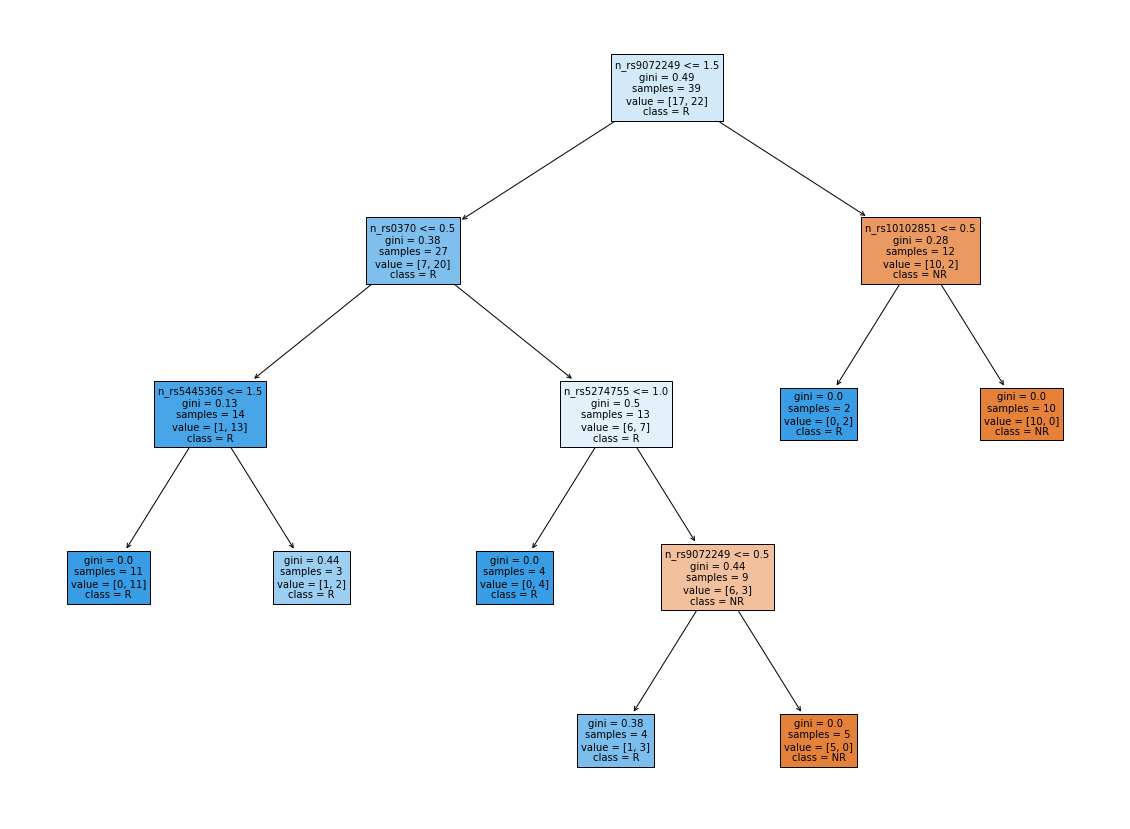

In [101]:
#Visualization of the learned tree classifier using plot_tree object, data without one-hot encoding

from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(20, 15))

print(f"Depth of the tree: {dtc_best.get_depth()}")
print(f"Number of terminal nodes (leaves): {dtc_best.get_n_leaves()}")

plot = plot_tree(
            decision_tree = dtc_best,
            feature_names = XTrainVal.columns,
            class_names   = dtc_best.classes_,
            filled        = True,
            impurity      = True,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

The tree has a depth of 4, and 7 leaves. Some leaves have a high number of samples (11, 10) but others have a very low number (2, 3). In each non-terminal node, we can see the condition checked by the classifier. Starting from the node at the top (the root), if that condition is fulfilled, the classifier moves to the left child node, else, it moves to the right child node. It repeats this process until it arrives to a leaf, and then classifies the sample according to the class of the leaf.

In each node we can see the impurity metric, in this case gini impurity. When the nodes are homogeneous, gini is 0, and when they have different classes, gini is larger than 0. We also see the number of samples, their values (the amount of samples that belong to each class, [class 0 = "NR", class 1 = "R"]), and the class of the majority of the samples (in case of the leaf nodes, this is the class that will get predicted for samples that arrive there).

We see that the root node is n_rs9072249, which is the feature by which the biggest separation is performed. It was also, in logistic regression, the feature with the largest coefficient in absolute value. Values of 0 or 1 get sent to the left, where the majority are "R", and values of 2 get sent to the right, where the majority are "NR". This is coherent with the previous interpretation of the logistic regression coefficients.

We could follow this reasoning for every other node.

Depth of the tree: 4
Number of terminal nodes (leaves): 7


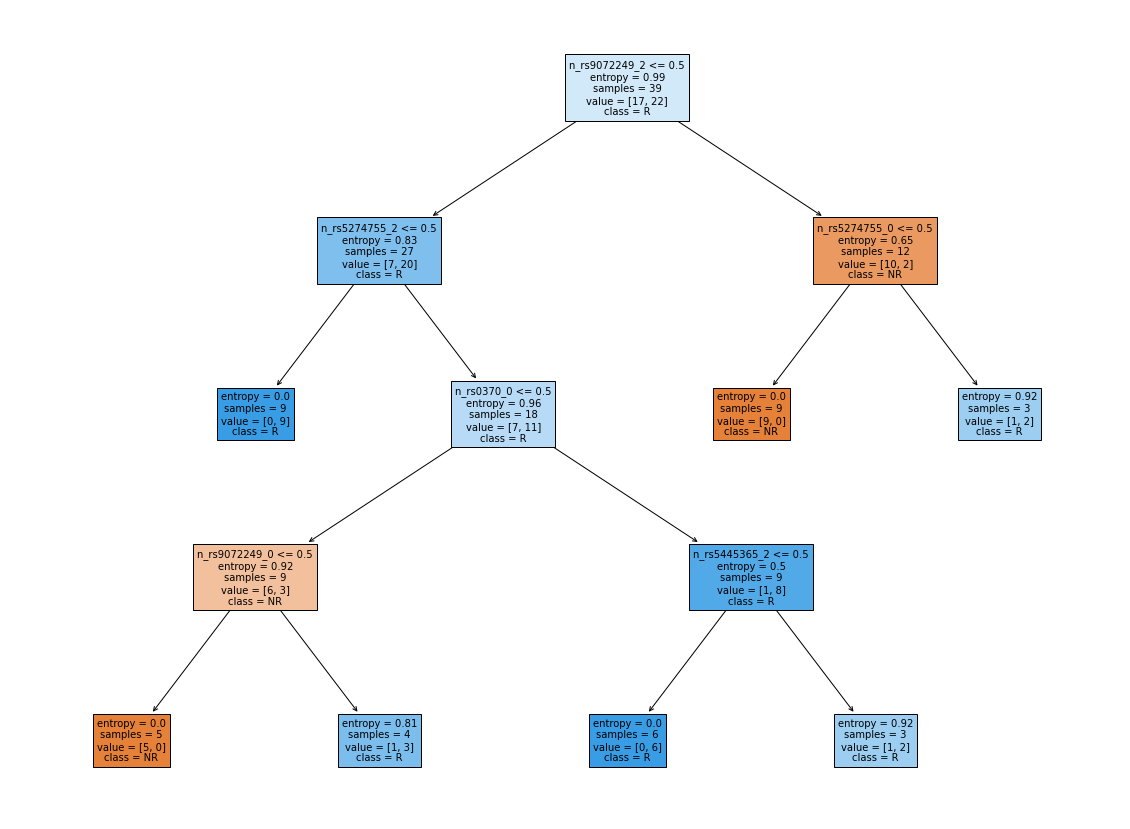

In [102]:
#Visualization of the learned tree classifier using plot_tree object, data with one-hot encoding

from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(20, 15))

print(f"Depth of the tree: {dtc_oh_best.get_depth()}")
print(f"Number of terminal nodes (leaves): {dtc_oh_best.get_n_leaves()}")

plot = plot_tree(
            decision_tree = dtc_oh_best,
            feature_names = XTrainValOH.columns,
            class_names   = dtc_oh_best.classes_,
            filled        = True,
            impurity      = True,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

In the case of the one-hot model, the tree also has depth of 4, and 7 leaves. The minimum size of the leaves is 3, and the maximum is 9. We have entropy instead of gini as an impurity metric. Entropy is 0 when there is homogeneity, and larger than 0 when there isn't.

Similarly to the previous tree, the root node is n_rs9072249_2. If it is 0, it goes to the left (where the majority is "R"), and if it is 1, it goes to the right, where the majority is "NR".

However, the features on the nodes are different than in the not one-hot model, although most of them are shared by both models.

In [60]:
# Feature importances for the decision tree classifier without one-hot encoding
pd.DataFrame(zip(XTrainVal.columns, dtc_best.feature_importances_), columns = ["Feature", "Importance"]).sort_values(by="Importance", ascending=False).query("Importance > 0")

,Feature,Importance
17,n_rs9072249,0.487930
5,n_rs10102851,0.203922
10,n_rs5274755,0.150588
16,n_rs0370,0.125515
3,n_rs5445365,0.032045


In [61]:
# Feature importances for the decision tree classifier with one-hot encoding
pd.DataFrame(zip(XTrainValOH.columns, dtc_oh_best.feature_importances_), columns = ["Feature", "Importance"]).sort_values(by="Importance", ascending=False).query("Importance > 0")

,Feature,Importance
57,n_rs9072249_2,0.283537
33,n_rs5274755_0,0.169414
55,n_rs9072249_0,0.168546
35,n_rs5274755_2,0.165825
52,n_rs0370_0,0.153096
11,n_rs5445365_2,0.059582


In [98]:
# Comparison with the five most important features in logistic regression
lr_dataframe.sort_values(by="Coef (log odds)").head().style.hide_index()

Feature,Coef (log odds),Odds,Probability
n_rs9072249,-0.000989,0.999012,0.499753
n_rs0370,-0.000887,0.999113,0.499778
n_rs9280789,-0.000739,0.999261,0.499815
n_rs133061,-0.000697,0.999303,0.499826
n_rs5445365,-0.000617,0.999384,0.499846


We can see that the most important feature in the trees, r_ns9072249, is also the most important feature in logistic regression. Also, others such as n_rs0370 or n_rs5445365 are also present in both cases.

#### K-Nearest neighbors

I will evaluate the KNN classifier, with and without one-hot encoding.

In [62]:
print("KNN")
print(knn.best_params_)
print(model_dict_full["KNN"])
print("")
print("KNN one-hot")
print(knn_oh.best_params_)
print(model_dict_full["KNN_OH"])

KNN
{'n_neighbors': 3, 'p': 1}
KNeighborsClassifier(n_neighbors=3, p=1)

KNN one-hot
{'n_neighbors': 7, 'p': 1}
KNeighborsClassifier(n_neighbors=7, p=1)


Confusion matrices

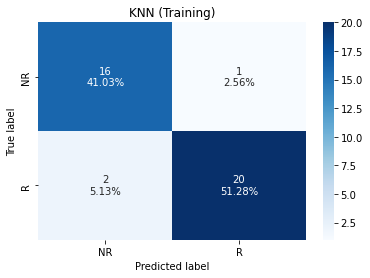

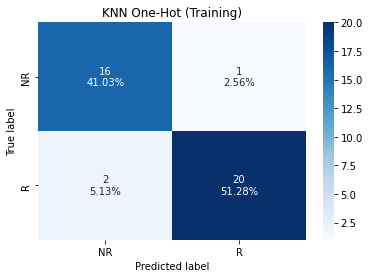

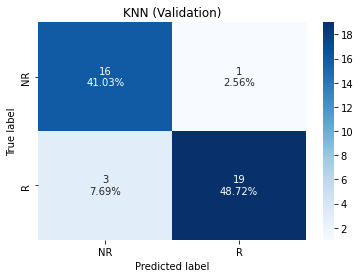

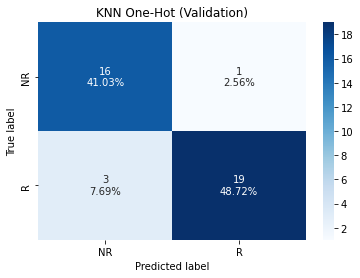

In [63]:
# KNN without one-hot encoding, Training confusion matrix   
make_confusion_matrix(confusion_matrix(y_true = yTrainVal, y_pred = predictions_Train["KNN"]), 
                      sum_stats = False, 
                      categories = model_dict_full["KNN"].classes_,
                      title = "KNN (Training)")
# KNN with one-hot encoding, Training confusion matrix
make_confusion_matrix(confusion_matrix(y_true = yTrainVal, y_pred = predictions_Train["KNN_OH"]), 
                      sum_stats = False, 
                      categories = model_dict_full["KNN_OH"].classes_,
                      title = "KNN One-Hot (Training)")
# KNN without one-hot encoding, Validation confusion matrix   
make_confusion_matrix(confusion_matrix(y_true = yTrainVal, y_pred = predictions_Val["KNN"]), 
                      sum_stats = False, 
                      categories = model_dict_full["KNN"].classes_,
                      title = "KNN (Validation)")
# KNN with one-hot encoding, Validation confusion matrix
make_confusion_matrix(confusion_matrix(y_true = yTrainVal, y_pred = predictions_Val["KNN_OH"]), 
                      sum_stats = False, 
                      categories = model_dict_full["KNN_OH"].classes_,
                      title = "KNN One-Hot (Validation)")

ROC curve

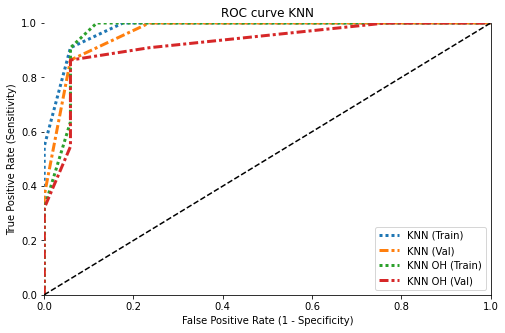

In [64]:
knn_proba_dict = {'KNN (Train)': predict_probabilities_Train["KNN"],
                 'KNN (Val)': predict_probabilities_Val["KNN"],
                 'KNN OH (Train)': predict_probabilities_Train["KNN_OH"],
                 'KNN OH (Val)': predict_probabilities_Val["KNN_OH"]}

plot_roc_curve(y_true = yTrainVal,
               predict_proba_dict= knn_proba_dict,
               title = "ROC curve KNN")

Metrics

In [65]:
models_val_metrics.query("Model == 'KNN' or Model == 'KNN_OH'")

,Model,Validation: accuracy,Validation: true positive rate = sensitivity = recall,Validation: true negative rate = specificity,Validation: false positive rate,Validation: false negative rate,Validation: positive predictive value = precision,Validation: negative predictive value,Validation: F1 score,Validation: Matthews correlation coefficient,Validation: area under ROC
2,KNN,0.897436,0.863636,0.941176,0.058824,0.136364,0.95,0.842105,0.904762,0.798434,0.965241
3,KNN_OH,0.897436,0.863636,0.941176,0.058824,0.136364,0.95,0.842105,0.904762,0.798434,0.922460


In [66]:
models_train_metrics.query("Model == 'KNN' or Model == 'KNN_OH'")

,Model,Training: accuracy,Training: true positive rate = sensitivity = recall,Training: true negative rate = specificity,Training: false positive rate,Training: false negative rate,Training: positive predictive value = precision,Training: negative predictive value,Training: F1 score,Training: Matthews correlation coefficient,Training: area under ROC
2,KNN,0.923077,0.909091,0.941176,0.058824,0.090909,0.952381,0.888889,0.930233,0.845757,0.978610
3,KNN_OH,0.923077,0.909091,0.941176,0.058824,0.090909,0.952381,0.888889,0.930233,0.845757,0.966578


Both KNN classifiers perform well on the training set (metrics of aroung 0.9-0.95).

On validation:

Their performance is slightly lower than in the training set, but they perform well. They are able to generalize correclty (there is approx less than 5% of a difference between training metrics and validation metrics). It should be noted that the false positive rate is very low, and the positive predictive value very high: this would probably be a good classifier for our problem. Looking at the confusion matrices, in validation there is only 1 FP and 3 FN.

Looking at the ROC curve and area under ROC, they validation curves are slightly below the training curves, but they are similar. Overall I consider these to be good models. Comparing KNN with KNN_OH, they are almost identical, KNN has a slightly higher area under ROC, so I would probably choose it if I had to pick between the two.

The good generalization of this model makes sense from a complexity perspective: it is a simple model, with only a few hyperparameters, the relevant ones are the number of neighbors and the distance metric used. It is not as easy to "memorize" the training set.

#### Random Forest Classifier

I will evaluate the random forest classifier, with and without one-hot encoding.

In [67]:
print("Random Forest")
print(rfc.best_params_)
print(model_dict_full["RandomForest"])
print("")
print("Random Forest one-hot")
print(rfc_oh.best_params_)
print(model_dict_full["RandomForest_OH"])

Random Forest
{'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}
RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, min_samples_leaf=2, n_estimators=500,
                       random_state=125)

Random Forest one-hot
{'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, min_samples_leaf=2, n_estimators=200,
                       random_state=125)


Confusion matrices

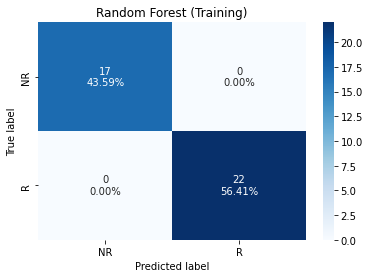

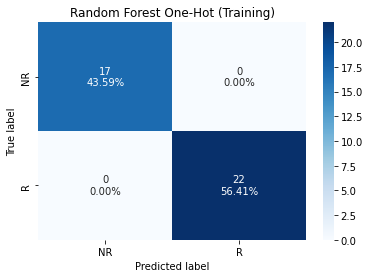

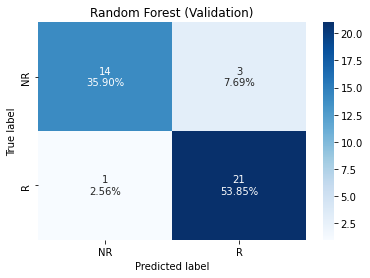

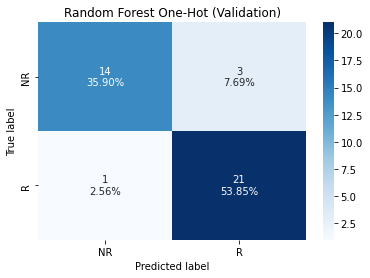

In [68]:
# Random Forest without one-hot encoding, Training confusion matrix   
make_confusion_matrix(confusion_matrix(y_true = yTrainVal, y_pred = predictions_Train["RandomForest"]), 
                      sum_stats = False, 
                      categories = model_dict_full["RandomForest"].classes_,
                      title = "Random Forest (Training)")
# Random Forest with one-hot encoding, Training confusion matrix
make_confusion_matrix(confusion_matrix(y_true = yTrainVal, y_pred = predictions_Train["RandomForest_OH"]), 
                      sum_stats = False, 
                      categories = model_dict_full["RandomForest_OH"].classes_,
                      title = "Random Forest One-Hot (Training)")
# Random Forest without one-hot encoding, Validation confusion matrix   
make_confusion_matrix(confusion_matrix(y_true = yTrainVal, y_pred = predictions_Val["RandomForest"]), 
                      sum_stats = False, 
                      categories = model_dict_full["RandomForest"].classes_,
                      title = "Random Forest (Validation)")
# Random Forest with one-hot encoding, Validation confusion matrix
make_confusion_matrix(confusion_matrix(y_true = yTrainVal, y_pred = predictions_Val["RandomForest_OH"]), 
                      sum_stats = False, 
                      categories = model_dict_full["RandomForest_OH"].classes_,
                      title = "Random Forest One-Hot (Validation)")

ROC curve

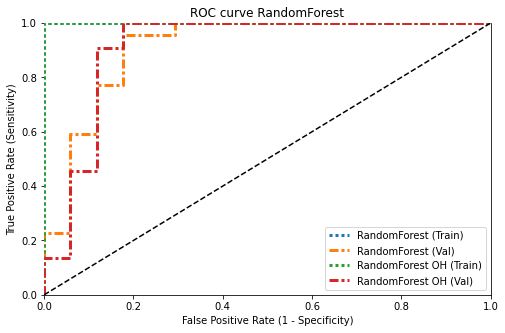

In [69]:
rfc_proba_dict = {'RandomForest (Train)': predict_probabilities_Train["RandomForest"],
                 'RandomForest (Val)': predict_probabilities_Val["RandomForest"],
                 'RandomForest OH (Train)': predict_probabilities_Train["RandomForest_OH"],
                 'RandomForest OH (Val)': predict_probabilities_Val["RandomForest_OH"]}

plot_roc_curve(y_true = yTrainVal,
               predict_proba_dict= rfc_proba_dict,
               title = "ROC curve RandomForest")

Metrics

In [70]:
models_val_metrics.query("Model == 'RandomForest' or Model == 'RandomForest_OH'")

,Model,Validation: accuracy,Validation: true positive rate = sensitivity = recall,Validation: true negative rate = specificity,Validation: false positive rate,Validation: false negative rate,Validation: positive predictive value = precision,Validation: negative predictive value,Validation: F1 score,Validation: Matthews correlation coefficient,Validation: area under ROC
8,RandomForest,0.897436,0.954545,0.823529,0.176471,0.045455,0.875,0.933333,0.913043,0.79306,0.911765
9,RandomForest_OH,0.897436,0.954545,0.823529,0.176471,0.045455,0.875,0.933333,0.913043,0.79306,0.911765


In [71]:
models_train_metrics.query("Model == 'RandomForest' or Model == 'RandomForest_OH'")

,Model,Training: accuracy,Training: true positive rate = sensitivity = recall,Training: true negative rate = specificity,Training: false positive rate,Training: false negative rate,Training: positive predictive value = precision,Training: negative predictive value,Training: F1 score,Training: Matthews correlation coefficient,Training: area under ROC
8,RandomForest,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
9,RandomForest_OH,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0


Both classifiers performed perfectly on the training set.

On validation:

They don't perform as well, there is a decrease in the validation scores, of approximately 10%. It is especially notable the drop of TNR from 1 to 0.8, because 3 samples are misclassified as false positives. This in undesirable for our problem.

Apart from that, they are able to generalize mostly well. They are both good classifiers, better than the decision trees, which shows the power of ensemble methods.

In this case, there is no difference between RandomForest and RandomForest_OH when looking at the metrics. In the ROC curve, we can see that in validation both curves are slightly different, but the area under it remains the same.

If I had to choose between both of them, based on the problem we have, I would probably choose the One-Hot model, RandomForest_OH, because on the curve, it reaches perfect sensitivity with a smaller false positive rate than in the case of the RandomForest.

#### MultiLayer Perceptron Classifier

I will evaluate the Multilayer perceptron, with and without one-hot encoding.

In [72]:
print("MLPerceptron")
print(mlp.best_params_)
print(model_dict_full["MLP"])
print("")
print("MLPerceptron one-hot")
print(mlp_oh.best_params_)
print(model_dict_full["MLP_OH"])

MLPerceptron
{'mlp__activation': 'logistic', 'mlp__alpha': 0.01, 'mlp__hidden_layer_sizes': (3,), 'mlp__max_iter': 200, 'mlp__solver': 'lbfgs'}
Pipeline(steps=[('minmax', MinMaxScaler()),
                ('mlp',
                 MLPClassifier(activation='logistic', alpha=0.01,
                               hidden_layer_sizes=(3,), random_state=125,
                               solver='lbfgs'))])

MLPerceptron one-hot
{'activation': 'logistic', 'alpha': 1e-06, 'hidden_layer_sizes': (4,), 'max_iter': 200, 'solver': 'lbfgs'}
MLPClassifier(activation='logistic', alpha=1e-06, hidden_layer_sizes=(4,),
              random_state=125, solver='lbfgs')


I'd like to note that, even though in the cross validation there were a lot of warnings about not being able to converge because of the small number of max_iter, both of the best models have max_iter = 200, the lowest of the values I tried in the hyperparameter tuning. In neural networks there is a technique called early stopping to avoid overfitting, and this probably is an accidental occurence of it. The ones that are most able to generalize on the validation set are the ones that have a small number of maximum iterations, on which the solver failed to reach convergence.

Confusion matrices

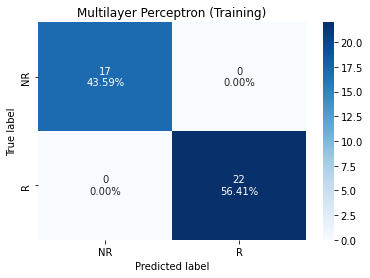

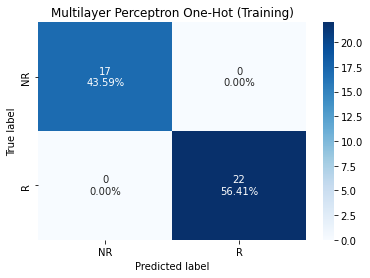

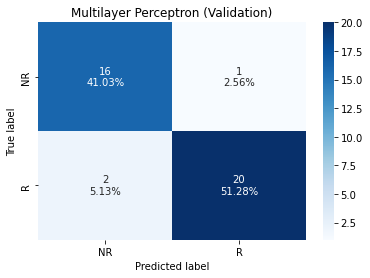

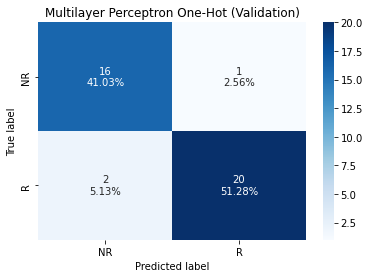

In [73]:
# MLP without one-hot encoding, Training confusion matrix   
make_confusion_matrix(confusion_matrix(y_true = yTrainVal, y_pred = predictions_Train["MLP"]), 
                      sum_stats = False, 
                      categories = model_dict_full["MLP"].classes_,
                      title = "Multilayer Perceptron (Training)")
# MLP with one-hot encoding, Training confusion matrix
make_confusion_matrix(confusion_matrix(y_true = yTrainVal, y_pred = predictions_Train["MLP_OH"]), 
                      sum_stats = False, 
                      categories = model_dict_full["MLP_OH"].classes_,
                      title = "Multilayer Perceptron One-Hot (Training)")
# MLP without one-hot encoding, Validation confusion matrix   
make_confusion_matrix(confusion_matrix(y_true = yTrainVal, y_pred = predictions_Val["MLP"]), 
                      sum_stats = False, 
                      categories = model_dict_full["MLP"].classes_,
                      title = "Multilayer Perceptron (Validation)")
# MLP with one-hot encoding, Validation confusion matrix
make_confusion_matrix(confusion_matrix(y_true = yTrainVal, y_pred = predictions_Val["MLP_OH"]), 
                      sum_stats = False, 
                      categories = model_dict_full["MLP_OH"].classes_,
                      title = "Multilayer Perceptron One-Hot (Validation)")

ROC curve

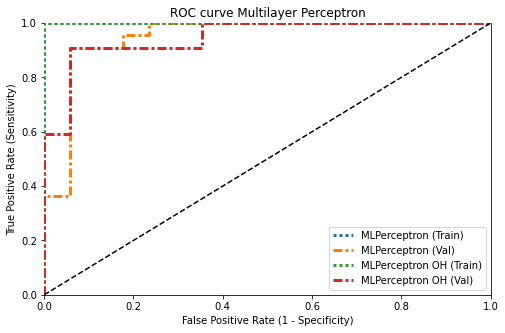

In [74]:
mlp_proba_dict = {'MLPerceptron (Train)': predict_probabilities_Train["MLP"],
                 'MLPerceptron (Val)': predict_probabilities_Val["MLP"],
                 'MLPerceptron OH (Train)': predict_probabilities_Train["MLP_OH"],
                 'MLPerceptron OH (Val)': predict_probabilities_Val["MLP_OH"]}

plot_roc_curve(y_true = yTrainVal,
               predict_proba_dict= mlp_proba_dict,
               title = "ROC curve Multilayer Perceptron")

Metrics

In [75]:
models_val_metrics.query("Model == 'MLP' or Model == 'MLP_OH'")

,Model,Validation: accuracy,Validation: true positive rate = sensitivity = recall,Validation: true negative rate = specificity,Validation: false positive rate,Validation: false negative rate,Validation: positive predictive value = precision,Validation: negative predictive value,Validation: F1 score,Validation: Matthews correlation coefficient,Validation: area under ROC
6,MLP,0.923077,0.909091,0.941176,0.058824,0.090909,0.952381,0.888889,0.930233,0.845757,0.949198
7,MLP_OH,0.923077,0.909091,0.941176,0.058824,0.090909,0.952381,0.888889,0.930233,0.845757,0.949198


In [76]:
models_train_metrics.query("Model == 'MLP' or Model == 'MLP_OH'")

,Model,Training: accuracy,Training: true positive rate = sensitivity = recall,Training: true negative rate = specificity,Training: false positive rate,Training: false negative rate,Training: positive predictive value = precision,Training: negative predictive value,Training: F1 score,Training: Matthews correlation coefficient,Training: area under ROC
6,MLP,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
7,MLP_OH,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0


On the training set, both models perform perfectly, as it happened with Random forests.

On validation:

They perform slightly worse than in training, but not too much. There are only 3 misclassifications: 1 false positive and 2 false negatives. The validation scores are around 0.9, and the false positive rate and positive predictive value are almost perfect. They are able to generalize well, and the proportion of false positives is very low, which is desirable for our problem.

Comparing MLP and MLP_OH, again in metrics they are exactly the same, both in training and in validation. The ROC curves are slightly different, but the area under the curve remains the same.

### Selection of the best model

As I explained before, I am giving importance to the correct identification of the patients that respond badly to the treatment. I want the model to generalize well, and I will give more importance to having a **large Matthews Correlation Coefficient** (to be good in general), and to having a **small False Positive Rate** and a **large Positive Predictive Value** (to avoid false positives).

In [77]:
selected_cols = ["Matthews correlation coefficient", "false positive rate", "positive predictive value = precision", "accuracy", "F1 score", "area under ROC"]

# looking at some relevant validation metrics for every model
models_train_val_metrics[["Model", *["Validation: " + col for col in selected_cols]]]

,Model,Validation: Matthews correlation coefficient,Validation: false positive rate,Validation: positive predictive value = precision,Validation: accuracy,Validation: F1 score,Validation: area under ROC
0,DecisionTree,0.318070,0.411765,0.695652,0.666667,0.711111,0.645722
1,DecisionTree_OH,0.223407,0.411765,0.666667,0.615385,0.651163,0.562834
2,KNN,0.798434,0.058824,0.950000,0.897436,0.904762,0.965241
3,KNN_OH,0.798434,0.058824,0.950000,0.897436,0.904762,0.922460
4,LogisticReg,0.843693,0.117647,0.913043,0.923077,0.933333,0.951872
5,LogisticReg_OH,0.899346,0.117647,0.916667,0.948718,0.956522,0.941176
6,MLP,0.845757,0.058824,0.952381,0.923077,0.930233,0.949198
7,MLP_OH,0.845757,0.058824,0.952381,0.923077,0.930233,0.949198
8,RandomForest,0.793060,0.176471,0.875000,0.897436,0.913043,0.911765
9,RandomForest_OH,0.793060,0.176471,0.875000,0.897436,0.913043,0.911765


I am discarding the decision trees because, as I have mentioned before, they are overfitting (especially DecisionTree_OH with one-hot encoding).

I am also discarding random forests, their false positive rates are approx 0.18, and their positive predictive value is 0.875. Around 1 in 8 positively classified patients are false positives. I think that proportion is too high, considering that the other three models (KNN, Logistic Regression and Multilayer perceptron) have both a better general score (Matthews correlation coefficient) and a better FPR and PPV.

As for the other three groups of models:

All of them generalized well, as explained before. The model with the highest Matthews correlation coefficient is LogisticReg_OH, logistic regression with one-hot encoding. However, its FPR and its PPV are slightly worse than the other models.

In [78]:
# Looking more in detail to these three models
models_val_metrics.query("Model != 'DecisionTree' and Model != 'DecisionTree_OH' and Model != 'RandomForest' and Model != 'RandomForest_OH'")

,Model,Validation: accuracy,Validation: true positive rate = sensitivity = recall,Validation: true negative rate = specificity,Validation: false positive rate,Validation: false negative rate,Validation: positive predictive value = precision,Validation: negative predictive value,Validation: F1 score,Validation: Matthews correlation coefficient,Validation: area under ROC
2,KNN,0.897436,0.863636,0.941176,0.058824,0.136364,0.950000,0.842105,0.904762,0.798434,0.965241
3,KNN_OH,0.897436,0.863636,0.941176,0.058824,0.136364,0.950000,0.842105,0.904762,0.798434,0.922460
4,LogisticReg,0.923077,0.954545,0.882353,0.117647,0.045455,0.913043,0.937500,0.933333,0.843693,0.951872
5,LogisticReg_OH,0.948718,1.000000,0.882353,0.117647,0.000000,0.916667,1.000000,0.956522,0.899346,0.941176
6,MLP,0.923077,0.909091,0.941176,0.058824,0.090909,0.952381,0.888889,0.930233,0.845757,0.949198
7,MLP_OH,0.923077,0.909091,0.941176,0.058824,0.090909,0.952381,0.888889,0.930233,0.845757,0.949198


KNN is slightly better than KNN_OH (area under ROC), and LogisticReg_OH is better than LogisticReg on almost every measure, so the decision is between KNN, LogisticReg_OH, and both MLP and MLP_OH.

LogisticReg_OH has perfect recall, and it's the best in terms of the Matthews correlation. However, as I explained before, its FPR and PPV is worse than in the other cases. I value more the lower FPR and the higher PPV.

The MLPs and KNN have equivalent FPR and PPV. The MLPs are overall better because they correctly classify one more sample (they have one less false negative, according to the confusion matrices, and we can also see this in the FNR and the NPV).

Choosing between the two MLPs is difficult, because their metrics are exactly the same. I also can't decide clearly when looking at their ROC curves.

If we look at their parameters:

In [79]:
mlp.best_params_ # normal, MLP

{'mlp__activation': 'logistic',
 'mlp__alpha': 0.01,
 'mlp__hidden_layer_sizes': (3,),
 'mlp__max_iter': 200,
 'mlp__solver': 'lbfgs'}

In [80]:
mlp_oh.best_params_ # one-hot, MLP_OH

{'activation': 'logistic',
 'alpha': 1e-06,
 'hidden_layer_sizes': (4,),
 'max_iter': 200,
 'solver': 'lbfgs'}

MLP has a smaller number of neurons in its hidden layer, so it is not as complex as MLP_OH (which has one more neuron). Just by the fact that MLP is more simple, I will choose MLP over MLP_OH. So, I consider the final best model to be **"MLP"**.

In [81]:
final_model_name = "MLP"
final_model = model_dict_full[final_model_name]

In [82]:
models_val_metrics.query("Model == '{}'".format(final_model_name))

,Model,Validation: accuracy,Validation: true positive rate = sensitivity = recall,Validation: true negative rate = specificity,Validation: false positive rate,Validation: false negative rate,Validation: positive predictive value = precision,Validation: negative predictive value,Validation: F1 score,Validation: Matthews correlation coefficient,Validation: area under ROC
6,MLP,0.923077,0.909091,0.941176,0.058824,0.090909,0.952381,0.888889,0.930233,0.845757,0.949198


### Evaluation of the final model using the test set.

Now I will proceed to evaluate the final model with the test set, a dataset that is truly unseen by the classifier: it hasn't been used for training, and it also hasn't been used for hyperparameter tuning and model selection. It is completely new, so it will be a good way to evaluate the performance of the model in the real world.

Ideally, there aren't any unbalances in the test set. When I did the train-test split, I used stratify = y so that the proportion of "R" and "NR" in the test set were more or less equal.

In [83]:
yhatTest = final_model.predict(XTest)
y_proba_Test = final_model.predict_proba(XTest)
test_metrics = get_metrics(y_true = yTest, 
                           y_pred = yhatTest, 
                           y_predict_proba= y_proba_Test,
                           prefix = "Test: ")
final_test_metrics = pd.DataFrame([{"Model": final_model_name, **test_metrics}])
final_test_metrics

,Model,Test: accuracy,Test: true positive rate = sensitivity = recall,Test: true negative rate = specificity,Test: false positive rate,Test: false negative rate,Test: positive predictive value = precision,Test: negative predictive value,Test: F1 score,Test: Matthews correlation coefficient,Test: area under ROC
0,MLP,0.785714,0.75,0.833333,0.166667,0.25,0.857143,0.714286,0.8,0.57735,0.958333


In [84]:
# Comparison with validation
models_val_metrics.query("Model == '{}'".format(final_model_name))

,Model,Validation: accuracy,Validation: true positive rate = sensitivity = recall,Validation: true negative rate = specificity,Validation: false positive rate,Validation: false negative rate,Validation: positive predictive value = precision,Validation: negative predictive value,Validation: F1 score,Validation: Matthews correlation coefficient,Validation: area under ROC
6,MLP,0.923077,0.909091,0.941176,0.058824,0.090909,0.952381,0.888889,0.930233,0.845757,0.949198


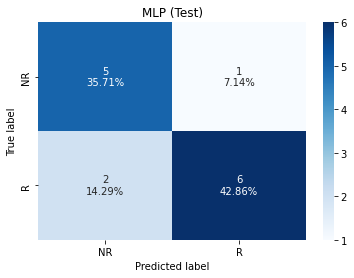

In [85]:
make_confusion_matrix(confusion_matrix(y_true = yTest, y_pred = yhatTest), 
                      sum_stats = False, 
                      categories = final_model.classes_,
                      title = final_model_name + " (Test)")

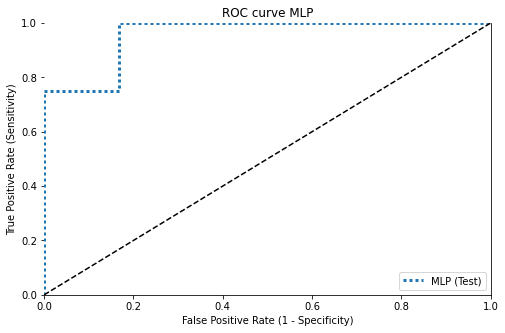

In [86]:
final_proba_dict = {final_model_name + ' (Test)': y_proba_Test}

plot_roc_curve(y_true = yTest,
               predict_proba_dict= final_proba_dict,
               title = "ROC curve " + final_model_name)

It is not as good with the test set as it is with the validation set (which again makes sense, because the validation set was used to tune the hyperparameters, and the test set is completely new data). The Matthews correlation coefficient has dropped a lot, from 0.84 to 0.57. However, in general, the FPR is 0.16 and the PPV is 0.85, and although they are not ideal, they are not bad either. From 7 predicted positives, 1 is a false positive.